<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Module2_Detection_Insect_harmed_potato_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Step - Green mask with contour technique**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 322 (delta 134), reused 136 (delta 90), pack-reused 113
Receiving objects: 100% (322/322), 77.45 MiB | 33.68 MiB/s, done.
Resolving deltas: 100% (204/204), done.


In [4]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.9 MB/s eta 0:00:00


In [5]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [6]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

**Preprocessing**

In [7]:
import cv2

img_no = 1
x = []
y = []
z = []
histo = []

for cls in classes:
    input_path = '/content/drive/MyDrive/Insect/Training/' + cls
    output_path = '/content/drive/MyDrive/Insect/Preprocessed/' + cls

    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j in os.listdir(input_path):
        realimage = cv2.imread(os.path.join(input_path, j), 1)

        # Preprocessing steps
        resizedImage = cv2.resize(realimage, (400, 400))

        color_contrastImage = img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))

        smooth_image = img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5, 5), 0, borderType=cv2.BORDER_CONSTANT))

        R, G, B = cv2.split(smooth_image)
        op_R = cv2.equalizeHist(R)
        op_G = cv2.equalizeHist(G)
        op_B = cv2.equalizeHist(B)
        histogram_image = cv2.merge((op_R, op_G, op_B))

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        op2_R = clahe.apply(R)
        op2_G = clahe.apply(G)
        op2_B = clahe.apply(B)
        clahe_image = cv2.merge((op2_R, op2_G, op2_B))

        x.append(clahe_image)
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

        img_no += 1

**Histogram for Original Image**

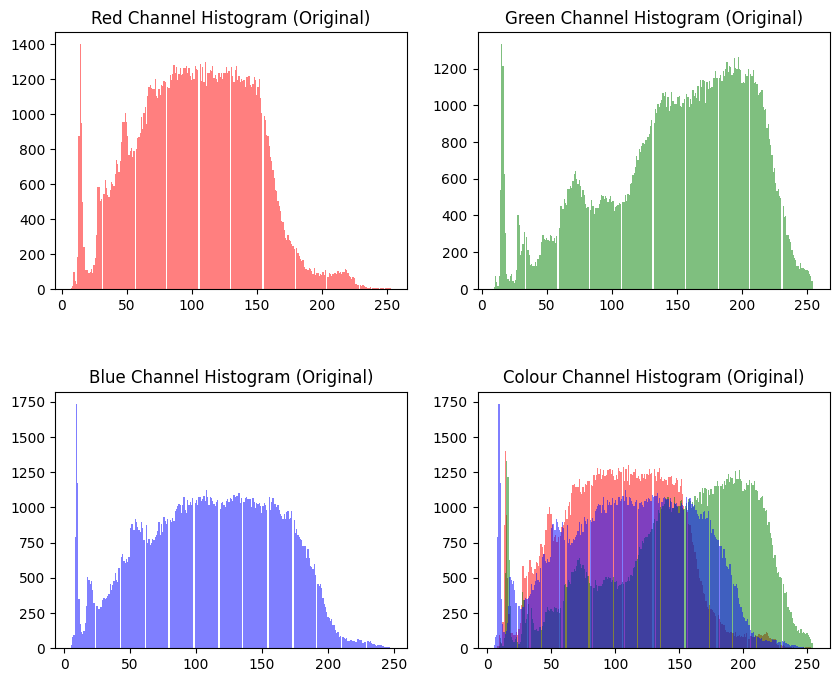

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Plotting the histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

        # Original Image Histograms
axes[0, 0].hist(R.ravel(), bins=256, color='red', alpha=0.5)
axes[0, 0].set_title('Red Channel Histogram (Original)')
axes[0, 1].hist(G.ravel(), bins=256, color='green', alpha=0.5)
axes[0, 1].set_title('Green Channel Histogram (Original)')
axes[1, 0].hist(B.ravel(), bins=256, color='blue', alpha=0.5)
axes[1, 0].set_title('Blue Channel Histogram (Original)')

axes[1, 1].hist(R.ravel(), bins=256, color='red', alpha=0.5)
axes[1, 1].set_title('Red Channel Histogram (Original)')
axes[1, 1].hist(G.ravel(), bins=256, color='green', alpha=0.5)
axes[1, 1].set_title('Green Channel Histogram (Original)')
axes[1, 1].hist(B.ravel(), bins=256, color='blue', alpha=0.5)
axes[1, 1].set_title('Colour Channel Histogram (Original)')

plt.show()


**Histogram for Preprocess Image**

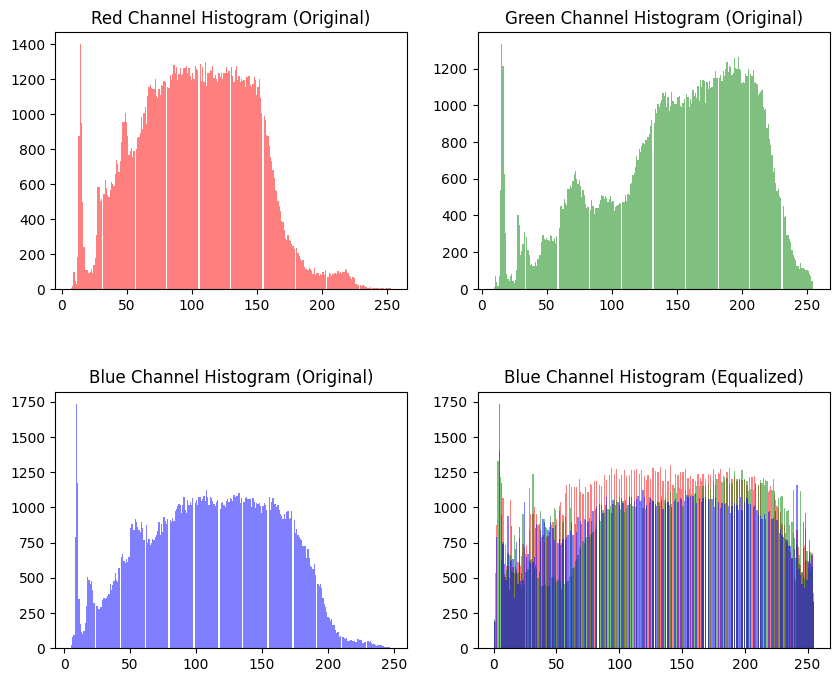

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Plotting the histograms
# Plotting the histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

        # Original Image Histograms
axes[0, 0].hist(R.ravel(), bins=256, color='red', alpha=0.5)
axes[0, 0].set_title('Red Channel Histogram (Original)')
axes[0, 1].hist(G.ravel(), bins=256, color='green', alpha=0.5)
axes[0, 1].set_title('Green Channel Histogram (Original)')
axes[1, 0].hist(B.ravel(), bins=256, color='blue', alpha=0.5)
axes[1, 0].set_title('Blue Channel Histogram (Original)')


        # Histogram Equalized Image Histograms
axes[1, 1].hist(op_R.ravel(), bins=256, color='red', alpha=0.5)
axes[1, 1].set_title('Red Channel Histogram (Equalized)')
axes[1, 1].hist(op_G.ravel(), bins=256, color='green', alpha=0.5)
axes[1, 1].set_title('Green Channel Histogram (Equalized)')
axes[1, 1].hist(op_B.ravel(), bins=256, color='blue', alpha=0.5)
axes[1, 1].set_title('Blue Channel Histogram (Equalized)')

plt.show()


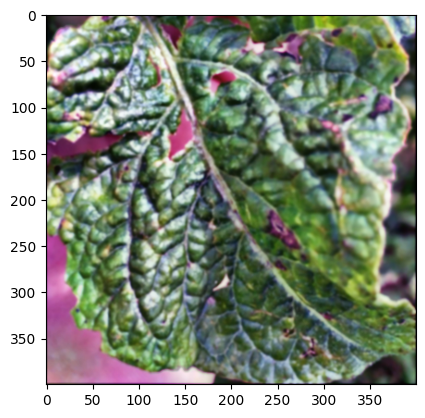

In [ ]:
plt.imshow(x[150])

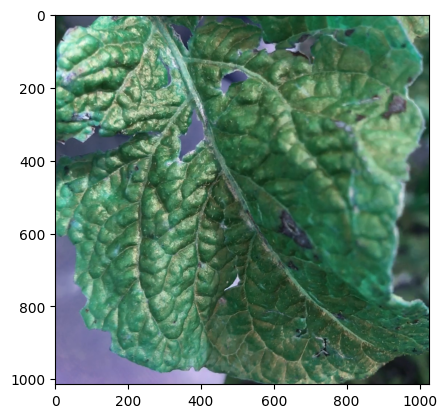

In [ ]:
plt.imshow(z[150])

**Augmentation**

In [ ]:
import random

classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/Preprocessed/'+ cls
    output_path = f'/content/drive/MyDrive/Insect/AugmentationImages/'+ cls

    target_size = 400

    # Augmentation parameters
    rotation_range = 30  # Rotation angle range in degrees
    scale_range = 0.2  # Scaling factor range

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Get the list of image files in the dataset directory
    image_files = [file for file in os.listdir(input_path) if file.endswith(".jpg") or file.endswith(".png")]

    # Shuffle the image files list
    np.random.shuffle(image_files)

    # Loop over each image file
    for file in image_files:
        if len(image_files) >= target_size:
            break

        # Read the image
        image_path = os.path.join(input_path, file)
        print(f"Reading image: {image_path}")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to read image: {image_path}")
            continue

        # Apply random augmentation
        for i in range(10):  # Generate 10 augmented versions for each image
          # Apply random rotation
          angle = np.random.uniform(-rotation_range, rotation_range)
          rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
          rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

          # Apply random scaling
          scale_factor = 1 + random.uniform(-scale_range, scale_range)
          scaled_image = cv2.resize(rotated_image, None, fx=scale_factor, fy=scale_factor)

          # Apply random flipping
          flip_direction = np.random.randint(-1, 2)
          flipped_image = cv2.flip(scaled_image, flip_direction)

          # Save augmented image
          augmented_file = f"augmented_{len(image_files)}.jpg"
          augmented_path = os.path.join(output_path, augmented_file)
          # cv2.imwrite(augmented_path, flipped_image)

          # Add augmented image to the list
          image_files.append(augmented_file)

          if len(image_files) >= target_size:
              break

        if len(image_files) % 50 == 0:
            print(f"Generated {len(image_files)} augmented images.")

print("Data augmentation complete!")

Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/27.jpg
Generated 200 augmented images.
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/77.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/74.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/96.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/70.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/118.jpg
Generated 250 augmented images.
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/98.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/5.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/136.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/152.jpg
Read

In [ ]:
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}
class_counts = {}

for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremoveImagesNew/' + cls
    file_count = len([f for f in os.listdir(pth) if os.path.isfile(os.path.join(pth, f))])
    class_counts[cls] = file_count

# Print the number of images for each class
for cls, count in class_counts.items():
    print(f"Number of images for class {cls}: {count}")

Number of images for class Insect_Coloradopotatobeetle: 400
Number of images for class Insect_Fleabeetle: 409


**Bg Remove**

In [ ]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']
output_base_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'

img_no = 1  # Counter for saving the processed images

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/preprocessing_augmentation/{cls}'

    # Create the output directory for the class if it doesn't exist
    output_path = os.path.join(output_base_path, cls)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j, file in enumerate(os.listdir(input_path)):
        image_path = os.path.join(input_path, file)
        realimage = cv2.imread(image_path, 1)
        img1 = cv2.resize(realimage, (400, 400))
#The image data type is converted to uint8 using img_as_ubyte() function from skimage library.
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)

        output_file = os.path.join(output_path, f'{img_no}.jpg')
        #cv2.imwrite(output_file, bg_rem_img_BGR)

        img_no += 1

print("Removing bg and saving complete!")

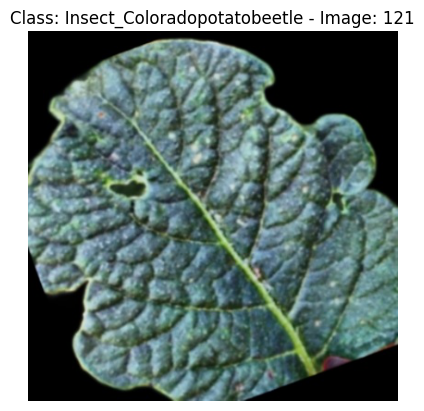

In [ ]:
import matplotlib.pyplot as plt

# Path to the directory containing the processed images
processed_images_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew'

# Function to display a specific image
def show_image(cls, img_num):
    class_output_path = os.path.join(processed_images_path, cls)
    image_path = os.path.join(class_output_path, f'{img_num}.jpg')
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f'Class: {cls} - Image: {img_num}')
    plt.axis('off')
    plt.show()

# Choose the image to display 121, 122, 201,123,12,15,1,52
cls = 'Insect_Coloradopotatobeetle'
img_num = 121

# Display the chosen image
show_image(cls, img_num)


In [9]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split

**Segmentation**

**Green mask and Contour technique**
**Colorado beetle harmed**

Perimeter1: 1260.9331055879593
Circularity1: 0.05468128734223446
Perimeter2: 371.2792181968689
Circularity2: 0.2042920442825205
Perimeter3: 354.79393684864044
Circularity3: 0.16312125453023466
Perimeter4: 325.9655097723007
Circularity4: 0.27639252402799863
Perimeter5: 321.1370825767517
Circularity5: 0.18497018711202934
No of: 129


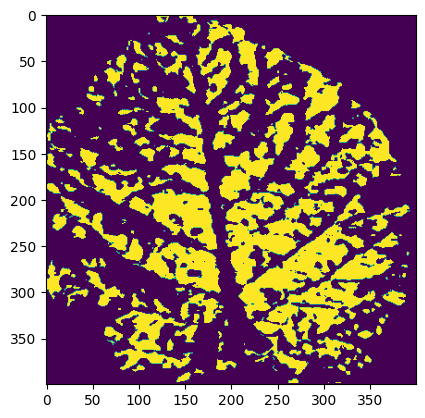

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image of the tomato plant
img = cv2.imread("/content/drive/MyDrive/Insect/bgRemove/Colorado/357.jpg")
bg_rem_img_BGR = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

plt.imshow(img)

# Convert the image to HSV color space
hsv = cv2.cvtColor(bg_rem_img_BGR, cv2.COLOR_BGR2HSV)

# Define the color range for the lesion areas
lower = np.array([0, 0, 134])
upper = np.array([36, 150, 255])

# Create a binary mask for the lesion areas
mask = cv2.inRange(hsv, lower, upper)
plt.imshow(mask)

# Apply morphological operations to remove noise and smooth the edges of the lesion areas
kernel = np.ones((5,5), np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)
mask = cv2.dilate(mask, kernel, iterations=1)

# Calculate the perimeter and circularity of the lesion areas
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

perimeters = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    perimeters.append(perimeter)

indices = np.argsort(perimeters)[::-1][:5]

if len(contours) > 0:
    contour1 = contours[indices[0]]
    perimeter1 = perimeters[indices[0]]
    area1 = cv2.contourArea(contour1)
    circularity1 = (4 * 3.1416 * area1) / (perimeter1 ** 2)
else:
    perimeter1 = 0
    circularity1 = -1

if len(contours) > 1 :
    contour2 = contours[indices[1]]
    perimeter2 = perimeters[indices[1]]
    area2 = cv2.contourArea(contour2)
    circularity2 = (4 * 3.1416 * area2) / (perimeter2 ** 2)
else:
    perimeter2 = 0
    circularity2 = -1

if len(contours) > 2 :
    contour3 = contours[indices[2]]
    perimeter3 = perimeters[indices[2]]
    area3 = cv2.contourArea(contour3)
    circularity3 = (4 * 3.1416 * area3) / (perimeter3 ** 2)
else:
    perimeter3 = 0
    circularity3 = -1

if len(contours) > 3 :
    contour4 = contours[indices[3]]
    perimeter4 = perimeters[indices[3]]
    area4 = cv2.contourArea(contour4)
    circularity4 = (4 * 3.1416 * area4) / (perimeter4 ** 2)
else:
    perimeter4 = 0
    circularity4 = -1

if len(contours) > 4 :
    contour5 = contours[indices[4]]
    perimeter5 = perimeters[indices[4]]
    area5 = cv2.contourArea(contour5)
    circularity5 = (4 * 3.1416 * area5) / (perimeter5 ** 2)
else:
    perimeter5 = 0
    circularity5 = -1

# Print the feature values
print("Perimeter1:", perimeter1)
print("Circularity1:", circularity1)
print("Perimeter2:", perimeter2)
print("Circularity2:", circularity2)
print("Perimeter3:", perimeter3)
print("Circularity3:", circularity3)
print("Perimeter4:", perimeter4)
print("Circularity4:", circularity4)
print("Perimeter5:", perimeter5)
print("Circularity5:", circularity5)
print("No of:", len(contours))

**Flea beetle harmed**

Perimeter1: 1722.586994767189
Circularity1: 0.45520658263529634
Perimeter2: 27.41421353816986
Circularity2: 0.7942421051538763
Perimeter3: 16.0
Circularity3: 0.7854
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 3


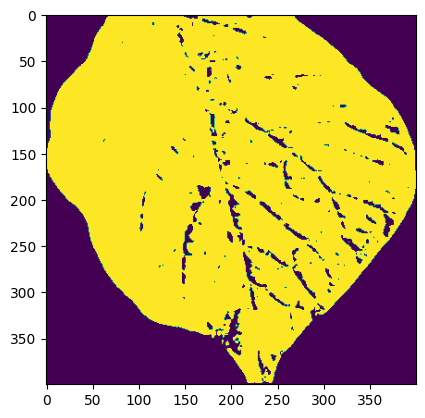

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



# Load the image of the tomato plant
img = cv2.imread("/content/drive/MyDrive/Insect/bgRemove/flea/210.jpg")
bg_rem_img_BGR = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

plt.imshow(img)

# Convert the image to HSV color space
hsv = cv2.cvtColor(bg_rem_img_BGR, cv2.COLOR_BGR2HSV)

# Define the color range for the lesion areas
lower = np.array([22, 0, 65])
upper = np.array([153, 255, 255])

# Create a binary mask for the lesion areas
mask = cv2.inRange(hsv, lower, upper)
plt.imshow(mask)

# Apply morphological operations to remove noise and smooth the edges of the lesion areas
kernel = np.ones((5,5), np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)
mask = cv2.dilate(mask, kernel, iterations=1)

# Calculate the perimeter and circularity of the lesion areas
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

perimeters = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    perimeters.append(perimeter)

indices = np.argsort(perimeters)[::-1][:5]

if len(contours) > 0:
    contour1 = contours[indices[0]]
    perimeter1 = perimeters[indices[0]]
    area1 = cv2.contourArea(contour1)
    circularity1 = (4 * 3.1416 * area1) / (perimeter1 ** 2)
else:
    perimeter1 = 0
    circularity1 = -1

if len(contours) > 1 :
    contour2 = contours[indices[1]]
    perimeter2 = perimeters[indices[1]]
    area2 = cv2.contourArea(contour2)
    circularity2 = (4 * 3.1416 * area2) / (perimeter2 ** 2)
else:
    perimeter2 = 0
    circularity2 = -1

if len(contours) > 2 :
    contour3 = contours[indices[2]]
    perimeter3 = perimeters[indices[2]]
    area3 = cv2.contourArea(contour3)
    circularity3 = (4 * 3.1416 * area3) / (perimeter3 ** 2)
else:
    perimeter3 = 0
    circularity3 = -1

if len(contours) > 3 :
    contour4 = contours[indices[3]]
    perimeter4 = perimeters[indices[3]]
    area4 = cv2.contourArea(contour4)
    circularity4 = (4 * 3.1416 * area4) / (perimeter4 ** 2)
else:
    perimeter4 = 0
    circularity4 = -1

if len(contours) > 4 :
    contour5 = contours[indices[4]]
    perimeter5 = perimeters[indices[4]]
    area5 = cv2.contourArea(contour5)
    circularity5 = (4 * 3.1416 * area5) / (perimeter5 ** 2)
else:
    perimeter5 = 0
    circularity5 = -1

# Print the feature values
print("Perimeter1:", perimeter1)
print("Circularity1:", circularity1)
print("Perimeter2:", perimeter2)
print("Circularity2:", circularity2)
print("Perimeter3:", perimeter3)
print("Circularity3:", circularity3)
print("Perimeter4:", perimeter4)
print("Circularity4:", circularity4)
print("Perimeter5:", perimeter5)
print("Circularity5:", circularity5)
print("No of:", len(contours))

In [12]:
path ='/content/drive/MyDrive/Insect/bgremoveImagesNew/'
classes = {'Colorado': 0, 'flea': 1}

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segmentation1(img):
  # Load the image of the tomato plant
  # Convert the image to HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define the color range for the lesion areas
  lower = np.array([37, 28, 0])
  upper = np.array([95, 255, 253])

  # Create a binary mask for the lesion areas
  mask = cv2.inRange(hsv, lower, upper)
  plt.imshow(mask)

  # Apply morphological operations to remove noise and smooth the edges of the lesion areas
  kernel = np.ones((5,5), np.uint8)
  mask = cv2.erode(mask, kernel, iterations=1)
  mask = cv2.dilate(mask, kernel, iterations=1)

  # Calculate the perimeter and circularity of the lesion areas
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  perimeters = []
  for contour in contours:
      perimeter = cv2.arcLength(contour, True)
      perimeters.append(perimeter)

  indices = np.argsort(perimeters)[::-1][:5]

  if len(contours) > 0:
      contour1 = contours[indices[0]]
      perimeter1 = perimeters[indices[0]]
      area1 = cv2.contourArea(contour1)
      circularity1 = (4 * 3.1416 * area1) / (perimeter1 ** 2)
  else:
      perimeter1 = 0
      circularity1 = -1

  if len(contours) > 1 :
      contour2 = contours[indices[1]]
      perimeter2 = perimeters[indices[1]]
      area2 = cv2.contourArea(contour2)
      circularity2 = (4 * 3.1416 * area2) / (perimeter2 ** 2)
  else:
      perimeter2 = 0
      circularity2 = -1

  if len(contours) > 2 :
      contour3 = contours[indices[2]]
      perimeter3 = perimeters[indices[2]]
      area3 = cv2.contourArea(contour3)
      circularity3 = (4 * 3.1416 * area3) / (perimeter3 ** 2)
  else:
      perimeter3 = 0
      circularity3 = -1

  if len(contours) > 3 :
      contour4 = contours[indices[3]]
      perimeter4 = perimeters[indices[3]]
      area4 = cv2.contourArea(contour4)
      circularity4 = (4 * 3.1416 * area4) / (perimeter4 ** 2)
  else:
      perimeter4 = 0
      circularity4 = -1

  if len(contours) > 4 :
      contour5 = contours[indices[4]]
      perimeter5 = perimeters[indices[4]]
      area5 = cv2.contourArea(contour5)
      circularity5 = (4 * 3.1416 * area5) / (perimeter5 ** 2)
  else:
      perimeter5 = 0
      circularity5 = -1

  # Print the feature values
  print("Perimeter1:", perimeter1)
  print("Circularity1:", circularity1)
  print("Perimeter2:", perimeter2)
  print("Circularity2:", circularity2)
  print("Perimeter3:", perimeter3)
  print("Circularity3:", circularity3)
  print("Perimeter4:", perimeter4)
  print("Circularity4:", circularity4)
  print("Perimeter5:", perimeter5)
  print("Circularity5:", circularity5)
  print("No of:", len(contours))

  return([perimeter1,circularity1,perimeter2,circularity2,perimeter3,circularity3,perimeter4,circularity4,perimeter5,circularity5,len(contours)])

**Extract features from Texture and area, Circularity, Contour and perimeter**

Texture Features:
Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118
Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118
Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 6175.587325334549
Circularity1: 0.03603254816409989
Perimeter2: 252.8528118133545
Circularity2: 0.2533542663264755
Perimeter3: 251.2964631319046
Circularity3: 0.22655370150507084
Perimeter4: 196.22539567947388
Circularity4: 0.22062115228973106
Perimeter5: 113.59797883033752
Circularity5: 0.3320657240673903
No of: 22
Perimeter1: 6175.587325334549
Circularity1: 0.03603254816409989
Perimeter2: 252.8528118133545
Circularity2: 0.2533542663264755
Perimeter3: 251.2964631319046
Circularity3: 0.22655370150507084
Perimeter4: 196.22539567947388
Circularity4: 0.22062115228973106
Perimeter5: 113.59797883033752
Circularity5: 0.3320657240673903
No of: 22
Perimeter1: 6175.587325334549
Circularity1: 0.03603254816409989
Perimeter2: 252.8528118133545
Circularity2: 0.2533542663264755
Perimeter3: 251.2964631319046
Circularity3: 0.22655370150507084
Perimeter4: 196.22539567947388
Circularity4: 0.22062115228973106
Perimeter5: 113.59797883033752
Circularity5: 0.3320657240673903
No of: 22
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

 0.03833332827389613
Perimeter2: 260.50966584682465
Circularity2: 0.1957213412476232
Perimeter3: 137.84061920642853
Circularity3: 0.3455753397108056
Perimeter4: 60.72792184352875
Circularity4: 0.7888329371728154
Perimeter5: 40.485281229019165
Circularity5: 0.6440147953592317
No of: 21
Perimeter1: 7131.542729735374
Circularity1: 0.023288246034996553
Perimeter2: 554.676186800003
Circularity2: 0.0891223405057321
Perimeter3: 475.26197278499603
Circularity3: 0.16503995610088468
Perimeter4: 257.5391038656235
Circularity4: 0.3974934741976239
Perimeter5: 181.154327750206
Circularity5: 0.21118300674745857
No of: 28
Perimeter1: 3176.1088540554047
Circularity1: 0.13029162903600602
Perimeter2: 173.2964631319046
Circularity2: 0.32575425578615785
Perimeter3: 84.14213538169861
Circularity3: 0.555556404077389
Perimeter4: 48.3847758769989
Circularity4: 0.6790221442488406
Perimeter5: 31.656854152679443
Circularity5: 0.7774403161618907
No of: 11
Perimeter1: 3587.0276819467545
Circularity1: 0.100982277421

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 3587.0276819467545
Circularity1: 0.1009822774216858
Perimeter2: 48.485281229019165
Circularity2: 0.5666265327762897
Perimeter3: 41.899494767189026
Circularity3: 0.6478014062238607
Perimeter4: 38.24264061450958
Circularity4: 0.44250926098194937
Perimeter5: 36.485281229019165
Circularity5: 0.7646461429175218
No of: 12
Perimeter1: 6112.717270255089
Circularity1: 0.029393661893579278
Perimeter2: 731.3279881477356
Circularity2: 0.06968794173594144
Perimeter3: 521.9898954629898
Circularity3: 0.15113433126818554
Perimeter4: 416.55129635334015
Circularity4: 0.2664064032723638
Perimeter5: 408.1076453924179
Circularity5: 0.11936249746139693
No of: 35
Perimeter1: 6112.717270255089
Circularity1: 0.029393661893579278
Perimeter2: 731.3279881477356
Circularity2: 0.06968794173594144
Perimeter3: 521.9898954629898
Circularity3: 0.15113433126818554
Perimeter4: 416.55129635334015
Circularity4: 0.2664064032723638
Perimeter5: 408.1076453924179
Circularity5: 0.11936249746139693
No of: 35
Perimete

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 3622.618520617485
Circularity1: 0.14030206572684836
Perimeter2: 82.97056233882904
Circularity2: 0.3815127869821512
Perimeter3: 64.14213538169861
Circularity3: 0.6689107356842172
Perimeter4: 61.899494767189026
Circularity4: 0.3755278560066488
Perimeter5: 54.82842707633972
Circularity5: 0.2926155124251123
No of: 10
Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56
Perimeter1: 2755.3636881113052
Circularity1: 0.18315805502758162
Perimeter2: 166.04163014888763
Circularity2: 0.4396217133957752
Perimeter3: 123.65685415267944
Circularity3: 0.17997766242783367
Perimeter4: 70.72792172431946
Circularity4: 0.5890768187613648
Perimeter5: 62.14213538169861
Circularity5: 0.40351549770031275
No of: 11
Perimeter1: 2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 2755.3636881113052
Circularity1: 0.18315805502758162
Perimeter2: 166.04163014888763
Circularity2: 0.4396217133957752
Perimeter3: 123.65685415267944
Circularity3: 0.17997766242783367
Perimeter4: 70.72792172431946
Circularity4: 0.5890768187613648
Perimeter5: 62.14213538169861
Circularity5: 0.40351549770031275
No of: 11
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1: 3392.4103726148605
Circularity1: 0.15292892358442015
Perimeter2: 55.31370830535889
Circularity2: 0.5996504792512232
Perimeter3: 49.899494767189026
Circularity3: 0.5374872796384249
Perimeter4: 49.899494767189026
Circularity4: 0.6485175158078649
Perimeter5: 48.14213538169861
Circularity5: 0.5042467740590323
No of: 8
Perimeter1:

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3392.4103726148605
Circularity1: 0.15292892358442015
Perimeter2: 55.31370830535889
Circularity2: 0.5996504792512232
Perimeter3: 49.899494767189026
Circularity3: 0.5374872796384249
Perimeter4: 49.899494767189026
Circularity4: 0.6485175158078649
Perimeter5: 48.14213538169861
Circularity5: 0.5042467740590323
No of: 8
Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 5129

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3389.277462363243
Circularity1: 0.043090607112129226
Perimeter2: 2051.574802994728
Circularity2: 0.09247544926621173
Perimeter3: 810.0142797231674
Circularity3: 0.18574096995598524
Perimeter4: 555.7472543716431
Circularity4: 0.193243155280813
Perimeter5: 406.93607234954834
Circularity5: 0.1311300538657657
No of: 31
Perimeter1: 3389.277462363243
Circularity1: 0.043090607112129226
Perimeter2: 2051.574802994728
Circularity2: 0.09247544926621173
Perimeter3: 810.0142797231674
Circularity3: 0.18574096995598524
Perimeter4: 555.7472543716431
Circularity4: 0.193243155280813
Perimeter5: 406.93607234954834
Circularity5: 0.1311300538657657
No of: 31
Perimeter1: 3389.277462363243
Circularity1: 0.043090607112129226
Perimeter2: 2051.574802994728
Circularity2: 0.09247544926621173
Perimeter3: 810.0142797231674
Circularity3: 0.18574096995598524
Perimeter4: 555.7472543716431
Circularity4: 0.193243155280813
Perimeter5: 406.93607234954834
Circularity5: 0.1311300538657657
No of: 31
Perimeter1: 3

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1314.2640606164932
Circularity1: 0.0583108191292899
Perimeter2: 1178.2813059091568
Circularity2: 0.0966366372833463
Perimeter3: 625.6051188707352
Circularity3: 0.09948595950592783
Perimeter4: 623.4457385540009
Circularity4: 0.0798242134737548
Perimeter5: 534.4335459470749
Circularity5: 0.13390499093524078
No of: 112
Perimeter1: 1710.5382261276245
Circularity1: 0.03924180149077449
Perimeter2: 1254.4234408140182
Circularity2: 0.09153810268225601
Perimeter3: 1061.6122583150864
Circularity3: 0.105725313427204
Perimeter4: 1015.3107432126999
Circularity4: 0.12867427398940795
Perimeter5: 798.6000663042068
Circularity5: 0.0636534491003991
No of: 83
Perimeter1: 1945.3494081497192
Circularity1: 0.03382522037485751
Perimeter2: 1231.636643409729
Circularity2: 0.05490705827825332
Perimeter3: 1082.3401800394058
Circularity3: 0.06432520148595777
Perimeter4: 652.6173115968704
Circularity4: 0.07508989317755162
Perimeter5: 596.5340510606766
Circularity5: 0.11053116292022819
No of: 125
Perime

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1486.548330783844
Circularity1: 0.05390329774712476
Perimeter2: 1368.6732206344604
Circularity2: 0.0671063034144633
Perimeter3: 1148.2813050746918
Circularity3: 0.07664880012470535
Perimeter4: 771.6295038461685
Circularity4: 0.10716258024047569
Perimeter5: 611.7056243419647
Circularity5: 0.10914636919461186
No of: 103
Perimeter1: 1486.548330783844
Circularity1: 0.05390329774712476
Perimeter2: 1368.6732206344604
Circularity2: 0.0671063034144633
Perimeter3: 1148.2813050746918
Circularity3: 0.07664880012470535
Perimeter4: 771.6295038461685
Circularity4: 0.10716258024047569
Perimeter5: 611.7056243419647
Circularity5: 0.10914636919461186
No of: 103
Perimeter1: 2796.4347549676895
Circularity1: 0.022118015672618195
Perimeter2: 1744.957492351532
Circularity2: 0.05506122081948277
Perimeter3: 927.1858525276184
Circularity3: 0.09087787310676497
Perimeter4: 861.2863577604294
Circularity4: 0.15948248818178715
Perimeter5: 580.1320307254791
Circularity5: 0.08938843548925599
No of: 90
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 3653.9809988737106
Circularity1: 0.019654445706737127
Perimeter2: 1760.7564816474915
Circularity2: 0.08056607402902961
Perimeter3: 907.8549002408981
Circularity3: 0.11175123841481553
Perimeter4: 574.5756808519363
Circularity4: 0.07869767773776284
Perimeter5: 486.77669191360474
Circularity5: 0.11426094934798453
No of: 88
Perimeter1: 1945.3494081497192
Circularity1: 0.03382522037485751
Perimeter2: 1231.636643409729
Circularity2: 0.05490705827825332
Perimeter3: 1082.3401800394058
Circularity3: 0.06432520148595777
Perimeter4: 652.6173115968704
Circularity4: 0.07508989317755162
Perimeter5: 596.5340510606766
Circularity5: 0.11053116292022819
No of: 125
Perimeter1: 3689.436842441559
Circularity1: 0.018487325486863736
Perimeter2: 1532.1046793460846
Circularity2: 0.07429789872721766
Perimeter3: 823.0020871162415
Circularity3: 0.19503610501457264
Perimeter4: 484.53405141830444
Circularity4: 0.12653473077384025
Perimeter5: 431.6639941930771
Circularity5: 0.3112705155555432
No of: 85
P

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3087.2631816864014
Circularity1: 0.09034808552282972
Perimeter2: 1529.6021536588669
Circularity2: 0.07081643188923527
Perimeter3: 603.019332408905
Circularity3: 0.10564375933599517
Perimeter4: 380.793937087059
Circularity4: 0.2031367205380634
Perimeter5: 228.4680359363556
Circularity5: 0.2456818038846308
No of: 69
Perimeter1: 2785.4469475746155
Circularity1: 0.07618751247177742
Perimeter2: 2090.4032298326492
Circularity2: 0.051931685415640486
Perimeter3: 1048.1807997226715
Circularity3: 0.09723183800838603
Perimeter4: 903.9137741327286
Circularity4: 0.07086343736007096
Perimeter5: 639.9310193061829
Circularity5: 0.1655832857324586
No of: 43
Perimeter1: 3689.436842441559
Circularity1: 0.018487325486863736
Perimeter2: 1532.1046793460846
Circularity2: 0.07429789872721766
Perimeter3: 823.0020871162415
Circularity3: 0.19503610501457264
Perimeter4: 484.53405141830444
Circularity4: 0.12653473077384025
Perimeter5: 431.6639941930771
Circularity5: 0.3112705155555432
No of: 85
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1867.2417616844177
Circularity1: 0.04554456697679338
Perimeter2: 1036.5828211307526
Circularity2: 0.08301161443826797
Perimeter3: 627.102593421936
Circularity3: 0.11254417904732861
Perimeter4: 600.2325356006622
Circularity4: 0.13793147935104605
Perimeter5: 541.5046136379242
Circularity5: 0.09912476939950404
No of: 120
Perimeter1: 1867.2417616844177
Circularity1: 0.04554456697679338
Perimeter2: 1036.5828211307526
Circularity2: 0.08301161443826797
Perimeter3: 627.102593421936
Circularity3: 0.11254417904732861
Perimeter4: 600.2325356006622
Circularity4: 0.13793147935104605
Perimeter5: 541.5046136379242
Circularity5: 0.09912476939950404
No of: 120
Perimeter1: 2652.351493358612
Circularity1: 0.02713711515708273
Perimeter2: 2316.0012102127075
Circularity2: 0.057615056971493564
Perimeter3: 950.0975395441055
Circularity3: 0.05926225091590122
Perimeter4: 847.5289978981018
Circularity4: 0.07148256192582046
Perimeter5: 644.7178165912628
Circularity5: 0.09122603816572662
No of: 71
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 5731.028891086578
Circularity1: 0.035311551500824066
Perimeter2: 280.89444184303284
Circularity2: 0.1985257616736872
Perimeter3: 60.14213538169861
Circularity3: 0.5628182951381518
Perimeter4: 46.485281109809875
Circularity4: 0.645509941411884
Perimeter5: 44.485281229019165
Circularity5: 0.368303793641084
No of: 18
Perimeter1: 3108.4763864278793
Circularity1: 0.15119345046733984
Perimeter2: 679.7888841629028
Circularity2: 0.148339741197795
Perimeter3: 630.8183218240738
Circularity3: 0.24129731080159963
Perimeter4: 229.9827550649643
Circularity4: 0.1994532124238728
Perimeter5: 55.071067690849304
Circularity5: 0.3957011006550449
No of: 16
Perimeter1: 2652

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

0.08301161443826797
Perimeter3: 627.102593421936
Circularity3: 0.11254417904732861
Perimeter4: 600.2325356006622
Circularity4: 0.13793147935104605
Perimeter5: 541.5046136379242
Circularity5: 0.09912476939950404
No of: 120
Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 3653.9809988737106
Circularity1: 0.019654445706737127
Perimeter2: 1760.7564816474915
Circularity2: 0.08056607

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2652.351493358612
Circularity1: 0.02713711515708273
Perimeter2: 2316.0012102127075
Circularity2: 0.057615056971493564
Perimeter3: 950.0975395441055
Circularity3: 0.05926225091590122
Perimeter4: 847.5289978981018
Circularity4: 0.07148256192582046
Perimeter5: 644.7178165912628
Circularity5: 0.09122603816572662
No of: 71
Perimeter1: 2499.8245837688446
Circularity1: 0.025091081942892182
Perimeter2: 1336.5483317375183
Circularity2: 0.11697893861884665
Perimeter3: 1212.8082163333893
Circularity3: 0.060307288235296665
Perimeter4: 1052.180800318718
Circularity4: 0.11657369911286145
Perimeter5: 893.6711345911026
Circularity5: 0.07604527130690264
No of: 62
Perimeter1: 2796.4347549676895
Circularity1: 0.022118015672618195
Perimeter2: 1744.957492351532
Circularity2: 0.05506122081948277
Perimeter3: 927.1858525276184
Circularity3: 0.09087787310676497
Perimeter4: 861.2863577604294
Circularity4: 0.15948248818178715
Perimeter5: 580.1320307254791
Circularity5: 0.08938843548925599
No of: 90
P

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

 484.53405141830444
Circularity4: 0.12653473077384025
Perimeter5: 431.6639941930771
Circularity5: 0.3112705155555432
No of: 85
Perimeter1: 3108.4763864278793
Circularity1: 0.15119345046733984
Perimeter2: 679.7888841629028
Circularity2: 0.148339741197795
Perimeter3: 630.8183218240738
Circularity3: 0.24129731080159963
Perimeter4: 229.9827550649643
Circularity4: 0.1994532124238728
Perimeter5: 55.071067690849304
Circularity5: 0.3957011006550449
No of: 16
Perimeter1: 1486.548330783844
Circularity1: 0.05390329774712476
Perimeter2: 1368.6732206344604
Circularity2: 0.0671063034144633
Perimeter3: 1148.2813050746918
Circularity3: 0.07664880012470535
Perimeter4: 771.6295038461685
Circularity4: 0.10716258024047569
Perimeter5: 611.7056243419647
Circularity5: 0.10914636919461186
No of: 103
Perimeter1: 1314.2640606164932
Circularity1: 0.0583108191292899
Perimeter2: 1178.2813059091568
Circularity2: 0.0966366372833463
Perimeter3: 625.6051188707352
Circularity3: 0.09948595950592783
Perimeter4: 623.44573

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

 0.0966366372833463
Perimeter3: 625.6051188707352
Circularity3: 0.09948595950592783
Perimeter4: 623.4457385540009
Circularity4: 0.0798242134737548
Perimeter5: 534.4335459470749
Circularity5: 0.13390499093524078
No of: 112
Perimeter1: 1314.2640606164932
Circularity1: 0.0583108191292899
Perimeter2: 1178.2813059091568
Circularity2: 0.0966366372833463
Perimeter3: 625.6051188707352
Circularity3: 0.09948595950592783
Perimeter4: 623.4457385540009
Circularity4: 0.0798242134737548
Perimeter5: 534.4335459470749
Circularity5: 0.13390499093524078
No of: 112
Perimeter1: 1314.2640606164932
Circularity1: 0.0583108191292899
Perimeter2: 1178.2813059091568
Circularity2: 0.0966366372833463
Perimeter3: 625.6051188707352
Circularity3: 0.09948595950592783
Perimeter4: 623.4457385540009
Circularity4: 0.0798242134737548
Perimeter5: 534.4335459470749
Circularity5: 0.13390499093524078
No of: 112
Perimeter1: 1583.4183884859085
Circularity1: 0.04525172233695197
Perimeter2: 1468.2468153238297
Circularity2: 0.063063

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

406.93607234954834
Circularity5: 0.1311300538657657
No of: 31
Perimeter1: 1933.141257405281
Circularity1: 0.03332401756072544
Perimeter2: 1284.5655761957169
Circularity2: 0.05434038747738655
Perimeter3: 626.9188274145126
Circularity3: 0.10498452194336053
Perimeter4: 443.3624778985977
Circularity4: 0.17075243133118487
Perimeter5: 405.4213536977768
Circularity5: 0.21559900343570015
No of: 128
Perimeter1: 2678.3931254148483
Circularity1: 0.023083159966196278
Perimeter2: 1783.869178891182
Circularity2: 0.05597875844300032
Perimeter3: 1074.5655753612518
Circularity3: 0.12034865886072353
Perimeter4: 656.4751759767532
Circularity4: 0.13894315876842248
Perimeter5: 623.9310194253922
Circularity5: 0.08276672010464614
No of: 102
Perimeter1: 2678.3931254148483
Circularity1: 0.023083159966196278
Perimeter2: 1783.869178891182
Circularity2: 0.05597875844300032
Perimeter3: 1074.5655753612518
Circularity3: 0.12034865886072353
Perimeter4: 656.4751759767532
Circularity4: 0.13894315876842248
Perimeter5: 6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter5: 623.9310194253922
Circularity5: 0.08276672010464614
No of: 102
Perimeter1: 2678.3931254148483
Circularity1: 0.023083159966196278
Perimeter2: 1783.869178891182
Circularity2: 0.05597875844300032
Perimeter3: 1074.5655753612518
Circularity3: 0.12034865886072353
Perimeter4: 656.4751759767532
Circularity4: 0.13894315876842248
Perimeter5: 623.9310194253922
Circularity5: 0.08276672010464614
No of: 102
Perimeter1: 2678.3931254148483
Circularity1: 0.023083159966196278
Perimeter2: 1783.869178891182
Circularity2: 0.05597875844300032
Perimeter3: 1074.5655753612518
Circularity3: 0.12034865886072353
Perimeter4: 656.4751759767532
Circularity4: 0.13894315876842248
Perimeter5: 623.9310194253922
Circularity5: 0.08276672010464614
No of: 102
Perimeter1: 1583.4183884859085
Circularity1: 0.04525172233695197
Perimeter2: 1468.2468153238297
Circularity2: 0.06306375029922437
Perimeter3: 1090.7249563932419
Circularity3: 0.0801402076437477
Perimeter4: 772.4579304456711
Circularity4: 0.06531801717987863

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

 2785.4469475746155
Circularity1: 0.07618751247177742
Perimeter2: 2090.4032298326492
Circularity2: 0.051931685415640486
Perimeter3: 1048.1807997226715
Circularity3: 0.09723183800838603
Perimeter4: 903.9137741327286
Circularity4: 0.07086343736007096
Perimeter5: 639.9310193061829
Circularity5: 0.1655832857324586
No of: 43
Perimeter1: 3108.4763864278793
Circularity1: 0.15119345046733984
Perimeter2: 679.7888841629028
Circularity2: 0.148339741197795
Perimeter3: 630.8183218240738
Circularity3: 0.24129731080159963
Perimeter4: 229.9827550649643
Circularity4: 0.1994532124238728
Perimeter5: 55.071067690849304
Circularity5: 0.3957011006550449
No of: 16
Perimeter1: 3108.4763864278793
Circularity1: 0.15119345046733984
Perimeter2: 679.7888841629028
Circularity2: 0.148339741197795
Perimeter3: 630.8183218240738
Circularity3: 0.24129731080159963
Perimeter4: 229.9827550649643
Circularity4: 0.1994532124238728
Perimeter5: 55.071067690849304
Circularity5: 0.3957011006550449
No of: 16
Perimeter1: 3108.47638

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2954.410372018814
Circularity1: 0.08460631149305477
Perimeter2: 2739.155537366867
Circularity2: 0.06958022074345331
Perimeter3: 486.8771970272064
Circularity3: 0.13305945231959848
Perimeter4: 349.23758816719055
Circularity4: 0.3625154114899611
Perimeter5: 281.6812391281128
Circularity5: 0.27066811425139475
No of: 39
Perimeter1: 2954.410372018814
Circularity1: 0.08460631149305477
Perimeter2: 2739.155537366867
Circularity2: 0.06958022074345331
Perimeter3: 486.8771970272064
Circularity3: 0.13305945231959848
Perimeter4: 349.23758816719055
Circularity4: 0.3625154114899611
Perimeter5: 281.6812391281128
Circularity5: 0.27066811425139475
No of: 39
Perimeter1: 2954.410372018814
Circularity1: 0.08460631149305477
Perimeter2: 2739.155537366867
Circularity2: 0.06958022074345331
Perimeter3: 486.8771970272064
Circularity3: 0.13305945231959848
Perimeter4: 349.23758816719055
Circularity4: 0.3625154114899611
Perimeter5: 281.6812391281128
Circularity5: 0.27066811425139475
No of: 39
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 2499.8245837688446
Circularity1: 0.025091081942892182
Perimeter2: 1336.5483317375183
Circularity2: 0.11697893861884665
Perimeter3: 1212.8082163333893
Circularity3: 0.060307288235296665
Perimeter4: 1052.180800318718
Circularity4: 0.11657369911286145
Perimeter5: 893.6711345911026
Circularity5: 0.07604527130690264
No of: 62
Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 1781.2001330852509
Circularity1: 0.03588901774426304
Perimeter2: 1045.4112488031387
Circularity2: 0.07669417423544952
Perimeter3: 946.3818105459213
Circularity3: 0.06556527566166175
Perimeter4: 497.46298348903656
Circularity4: 0.11631069085937049
Perimeter5: 397.1370828151703
Circularity5: 0.20556525098956413
No of: 125
Perimete

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1781.2001330852509
Circularity1: 0.03588901774426304
Perimeter2: 1045.4112488031387
Circularity2: 0.07669417423544952
Perimeter3: 946.3818105459213
Circularity3: 0.06556527566166175
Perimeter4: 497.46298348903656
Circularity4: 0.11631069085937049
Perimeter5: 397.1370828151703
Circularity5: 0.20556525098956413
No of: 125
Perimeter1: 2405.214411497116
Circularity1: 0.049726400338435395
Perimeter2: 1940.8397423028946
Circularity2: 0.03220781872908018
Perimeter3: 1642.0285598039627
Circularity3: 0.03818030647348828
Perimeter4: 847.8132693767548
Circularity4: 0.0608225871317418
Perimeter5: 607.8893897533417
Circularity5: 0.10917782230958417
No of: 75
Perimeter1: 2405.214411497116
Circularity1: 0.049726400338435395
Perimeter2: 1940.8397423028946
Circularity2: 0.03220781872908018
Perimeter3: 1642.0285598039627
Circularity3: 0.03818030647348828
Perimeter4: 847.8132693767548
Circularity4: 0.0608225871317418
Perimeter5: 607.8893897533417
Circularity5: 0.10917782230958417
No of: 75
Pe

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2583.0966606140137
Circularity1: 0.10464422118879964
Perimeter2: 2043.9179493188858
Circularity2: 0.07630350944878538
Perimeter3: 866.7838314771652
Circularity3: 0.07267399875601874
Perimeter4: 737.2447280883789
Circularity4: 0.15834877007099632
Perimeter5: 440.93607211112976
Circularity5: 0.1414833658619512
No of: 25
Perimeter1: 2583.0966606140137
Circularity1: 0.10464422118879964
Perimeter2: 2043.9179493188858
Circularity2: 0.07630350944878538
Perimeter3: 866.7838314771652
Circularity3: 0.07267399875601874
Perimeter4: 737.2447280883789
Circularity4: 0.15834877007099632
Perimeter5: 440.93607211112976
Circularity5: 0.1414833658619512
No of: 25
Perimeter1: 2583.0966606140137
Circularity1: 0.10464422118879964
Perimeter2: 2043.9179493188858
Circularity2: 0.07630350944878538
Perimeter3: 866.7838314771652
Circularity3: 0.07267399875601874
Perimeter4: 737.2447280883789
Circularity4: 0.15834877007099632
Perimeter5: 440.93607211112976
Circularity5: 0.1414833658619512
No of: 25
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1694.9402471780777
Circularity1: 0.052355216746793935
Perimeter2: 1102.6833262443542
Circularity2: 0.11444430189771283
Perimeter3: 1072.1980456113815
Circularity3: 0.09023013952536736
Perimeter4: 924.4406852722168
Circularity4: 0.0646854702775424
Perimeter5: 623.6467484235764
Circularity5: 0.11014392690674424
No of: 119
Perimeter1: 1710.5382261276245
Circularity1: 0.03924180149077449
Perimeter2: 1254.4234408140182
Circularity2: 0.09153810268225601
Perimeter3: 1061.6122583150864
Circularity3: 0.105725313427204
Perimeter4: 1015.3107432126999
Circularity4: 0.12867427398940795
Perimeter5: 798.6000663042068
Circularity5: 0.0636534491003991
No of: 83
Perimeter1: 3653.9809988737106
Circularity1: 0.019654445706737127
Perimeter2: 1760.7564816474915
Circularity2: 0.08056607402902961
Perimeter3: 907.8549002408981
Circularity3: 0.11175123841481553
Perimeter4: 574.5756808519363
Circularity4: 0.07869767773776284
Perimeter5: 486.77669191360474
Circularity5: 0.11426094934798453
No of: 88
P

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5272.3354575634
Circularity1: 0.02281954333838291
Perimeter2: 3622.2652690410614
Circularity2: 0.028187903291903654
Perimeter3: 380.10764479637146
Circularity3: 0.13185508173088856
Perimeter4: 288.65180134773254
Circularity4: 0.18686744249857803
Perimeter5: 282.26702558994293
Circularity5: 0.16836757994831777
No of: 28
Perimeter1: 5272.3354575634
Circularity1: 0.02281954333838291
Perimeter2: 3622.2652690410614
Circularity2: 0.028187903291903654
Perimeter3: 380.10764479637146
Circularity3: 0.13185508173088856
Perimeter4: 288.65180134773254
Circularity4: 0.18686744249857803
Perimeter5: 282.26702558994293
Circularity5: 0.16836757994831777
No of: 28
Perimeter1: 4036.7160605192184
Circularity1: 0.06596615666622072
Perimeter2: 1648.4305800199509
Circularity2: 0.07076950090572331
Perimeter3: 808.6589413881302
Circularity3: 0.15057289784448344
Perimeter4: 591.7472542524338
Circularity4: 0.22546071189368122
Perimeter5: 134.66904628276825
Circularity5: 0.2982967120432824
No of: 30
Pe

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 4036.7160605192184
Circularity1: 0.06596615666622072
Perimeter2: 1648.4305800199509
Circularity2: 0.07076950090572331
Perimeter3: 808.6589413881302
Circularity3: 0.15057289784448344
Perimeter4: 591.7472542524338
Circularity4: 0.22546071189368122
Perimeter5: 134.66904628276825
Circularity5: 0.2982967120432824
No of: 30
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimete

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3513.443979024887
Circularity1: 0.04469498487580014
Perimeter2: 1459.158500790596
Circularity2: 0.09323829096667706
Perimeter3: 1265.5361375808716
Circularity3: 0.07917251924831323
Perimeter4: 638.5168055295944
Circularity4: 0.09100308632001107
Perimeter5: 515.3036025762558
Circularity5: 0.13421181474140365
No of: 74
Perimeter1: 3513.443979024887
Circularity1: 0.04469498487580014
Perimeter2: 1459.158500790596
Circularity2: 0.09323829096667706
Perimeter3: 1265.5361375808716
Circularity3: 0.07917251924831323
Perimeter4: 638.5168055295944
Circularity4: 0.09100308632001107
Perimeter5: 515.3036025762558
Circularity5: 0.13421181474140365
No of: 74
Perimeter1: 3513.443979024887
Circularity1: 0.04469498487580014
Perimeter2: 1459.158500790596
Circularity2: 0.09323829096667706
Perimeter3: 1265.5361375808716
Circularity3: 0.07917251924831323
Perimeter4: 638.5168055295944
Circularity4: 0.09100308632001107
Perimeter5: 515.3036025762558
Circularity5: 0.13421181474140365
No of: 74
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3176.1088540554047
Circularity1: 0.13029162903600602
Perimeter2: 173.2964631319046
Circularity2: 0.32575425578615785
Perimeter3: 84.14213538169861
Circularity3: 0.555556404077389
Perimeter4: 48.3847758769989
Circularity4: 0.6790221442488406
Perimeter5: 31.656854152679443
Circularity5: 0.7774403161618907
No of: 11
Perimeter1: 5422.702988386154
Circularity1: 0.03833332827389613
Perimeter2: 260.50966584682465
Circularity2: 0.1957213412476232
Perimeter3: 137.84061920642853
Circularity3: 0.3455753397108056
Perimeter4: 60.72792184352875
Circularity4: 0.7888329371728154
Perimeter5: 40.485281229019165
Circularity5: 0.6440147953592317
No of: 21
Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 209

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 7

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 3638.1403789520264
Circularity1: 0.1001215091534543
Perimeter2: 38.14213526248932
Circularity2: 0.7514846747556032
Perimeter3: 27.656854152679443
Circularity3: 0.772152671912534
Perimeter4: 18.0
Circularity4: 0.7757037037037037
Perimeter5: 18.0
Circularity5: 0.7757037037037037
No of: 7
Perimeter1: 7131.542729735374
Circularity1: 0.023288246034996553
Perimeter2: 554.676186800003
Circularity2: 0.0891223405057321
Perimeter3: 475.26197278499603
Circularity3: 0.16503995610088468
Perimeter4: 257.5391038656235
Circularity4: 0.3974934741976239
Perimeter5: 181.154327750206
Circularity5: 0.21118300674745857
No of: 28
Perimeter1: 7131.542729735374
Circularity1: 0

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

181.154327750206
Circularity5: 0.21118300674745857
No of: 28
Perimeter1: 7131.542729735374
Circularity1: 0.023288246034996553
Perimeter2: 554.676186800003
Circularity2: 0.0891223405057321
Perimeter3: 475.26197278499603
Circularity3: 0.16503995610088468
Perimeter4: 257.5391038656235
Circularity4: 0.3974934741976239
Perimeter5: 181.154327750206
Circularity5: 0.21118300674745857
No of: 28
Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.1959580183

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 51

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 5422.702988386154
Circularity1: 0.03833332827389613
Perimeter2: 260.50966584682465
Circularity2: 0.1957213412476232
Perimeter3: 137.84061920642853
Circularity3: 0.3455753397108056
Perimeter4: 60.72792184352875
Circularity4: 0.7888329371728154
Perimeter5: 40.485281229019165
Circularity5: 0.6440147953592317
No of: 21
Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56
Perimeter1: 19

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56
Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56
Perimeter1: 2244.202219247818
Circularity1: 0.042170830536655525
Perimeter2: 1891.81030356884
Circularity2: 0.046096803931253726
Perimeter3: 794.0142798423767
Circularity3: 0.08016712700835628
Perimeter4: 731.972650051117
Circularity4: 0.07232111683488744
Perimeter5: 723.8721442222595
Circularity5: 0.07623908551608159
No of: 72
Perimeter1: 

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2244.202219247818
Circularity1: 0.042170830536655525
Perimeter2: 1891.81030356884
Circularity2: 0.046096803931253726
Perimeter3: 794.0142798423767
Circularity3: 0.08016712700835628
Perimeter4: 731.972650051117
Circularity4: 0.07232111683488744
Perimeter5: 723.8721442222595
Circularity5: 0.07623908551608159
No of: 72
Perimeter1: 3120.861160993576
Circularity1: 0.048011469081116094
Perimeter2: 1981.609293103218
Circularity2: 0.06122430179755959
Perimeter3: 611.019332408905
Circularity3: 0.10168378463455616
Perimeter4: 609.9066348075867
Circularity4: 0.22269033195414892
Perimeter5: 474.39191579818726
Circularity5: 0.0967128559364101
No of: 104
Perimeter1: 3064.358634829521
Circularity1: 0.08547895627470822
Perimeter2: 1610.780867099762
Circularity2: 0.06747874651058015
Perimeter3: 166.91168689727783
Circularity3: 0.3788930794781955
Perimeter4: 146.66904664039612
Circularity4: 0.26783867107946085
Perimeter5: 143.74011409282684
Circularity5: 0.3807406459020812
No of: 34
Perimete

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1792.2955850362778
Circularity1: 0.027127311982361346
Perimeter2: 1749.0407514572144
Circularity2: 0.03523479504285074
Perimeter3: 580.5340511798859
Circularity3: 0.0775193231833853
Perimeter4: 558.9188269376755
Circularity4: 0.24761487894014028
Perimeter5: 409.62236404418945
Circularity5: 0.19899176983166336
No of: 156
Perimeter1: 2394.711886048317
Circularity1: 0.14252625980357003
Perimeter2: 2388.5525048971176
Circularity2: 0.04367151935388178
Perimeter3: 265.33809304237366
Circularity3: 0.2063333866426412
Perimeter4: 197.15432786941528
Circularity4: 0.2329336514588092
Perimeter5: 181.63960909843445
Circularity5: 0.3102278985839251
No of: 34
Perimeter1: 4929.683656096458
Circularity1: 0.01255565421472695
Perimeter2: 993.0264720916748
Circularity2: 0.05403887448327718
Perimeter3: 565.3624787330627
Circularity3: 0.08700382150194132
Perimeter4: 481.2792180776596
Circularity4: 0.28748194940298183
Perimeter5: 390.93607199192047
Circularity5: 0.25390817344309285
No of: 151
Per

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

 3514.9200361967087
Circularity1: 0.09769917907061891
Perimeter2: 1691.342269062996
Circularity2: 0.14466144311686177
Perimeter3: 88.04163002967834
Circularity3: 0.3850333467943196
Perimeter4: 85.21320307254791
Circularity4: 0.26218614127774753
Perimeter5: 58.97056233882904
Circularity5: 0.49506350053350995
No of: 16
Perimeter1: 3514.9200361967087
Circularity1: 0.09769917907061891
Perimeter2: 1691.342269062996
Circularity2: 0.14466144311686177
Perimeter3: 88.04163002967834
Circularity3: 0.3850333467943196
Perimeter4: 85.21320307254791
Circularity4: 0.26218614127774753
Perimeter5: 58.97056233882904
Circularity5: 0.49506350053350995
No of: 16
Perimeter1: 3001.9595786333084
Circularity1: 0.2023687420152282
Perimeter2: 71.55634891986847
Circularity2: 0.40126593318524223
Perimeter3: 40.24264061450958
Circularity3: 0.5625691926682012
Perimeter4: 29.656854152679443
Circularity4: 0.7286700055226619
Perimeter5: 22.0
Circularity5: 0.7269818181818182
No of: 6
Perimeter1: 3333.914983153343
Circula

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2410.469244480133
Circularity1: 0.0525182238773931
Perimeter2: 1719.7270438671112
Circularity2: 0.06566694265053186
Perimeter3: 1470.4894568920135
Circularity3: 0.06150874708535339
Perimeter4: 1300.3818106651306
Circularity4: 0.09088570166402961
Perimeter5: 826.0142792463303
Circularity5: 0.17533665538970344
No of: 47
Perimeter1: 2410.469244480133
Circularity1: 0.0525182238773931
Perimeter2: 1719.7270438671112
Circularity2: 0.06566694265053186
Perimeter3: 1470.4894568920135
Circularity3: 0.06150874708535339
Perimeter4: 1300.3818106651306
Circularity4: 0.09088570166402961
Perimeter5: 826.0142792463303
Circularity5: 0.17533665538970344
No of: 47
Perimeter1: 2410.469244480133
Circularity1: 0.0525182238773931
Perimeter2: 1719.7270438671112
Circularity2: 0.06566694265053186
Perimeter3: 1470.4894568920135
Circularity3: 0.06150874708535339
Perimeter4: 1300.3818106651306
Circularity4: 0.09088570166402961
Perimeter5: 826.0142792463303
Circularity5: 0.17533665538970344
No of: 47
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2344.773726582527
Circularity1: 0.34756221442659985
Perimeter2: 52.72792184352875
Circularity2: 0.7525646381595508
Perimeter3: 31.41421353816986
Circularity3: 0.42658276369729986
Perimeter4: 18.82842707633972
Circularity4: 0.7089454082195827
Perimeter5: 16.0
Circularity5: 0.7854
No of: 6
Perimeter1: 2344.773726582527
Circularity1: 0.34756221442659985
Perimeter2: 52.72792184352875
Circularity2: 0.7525646381595508
Perimeter3: 31.41421353816986
Circularity3: 0.42658276369729986
Perimeter4: 18.82842707633972
Circularity4: 0.7089454082195827
Perimeter5: 16.0
Circularity5: 0.7854
No of: 6
Perimeter1: 3570.968806385994
Circularity1: 0.05045256840186022
Perimeter2: 1659.6265382766724
Circularity2: 0.06814350106706063
Perimeter3: 1449.0752433538437
Circularity3: 0.0559342753797097
Perimeter4: 1064.4234400987625
Circularity4: 0.06630927104904112
Perimeter5: 948.1980451345444
Circularity5: 0.08395261914725934
No of: 40
Perimeter1: 2709.9494733810425
Circularity1: 0.05359497984470675
P

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4901.451121330261
Circularity1: 0.0545498780472207
Perimeter2: 380.7939373254776
Circularity2: 0.13839989005676445
Perimeter3: 371.03657710552216
Circularity3: 0.1384266932451722
Perimeter4: 346.4091616868973
Circularity4: 0.18425590361625327
Perimeter5: 260.4680360555649
Circularity5: 0.23366263158950232
No of: 37
Perimeter1: 2716.319970726967
Circularity1: 0.2466880073312408
Perimeter2: 203.8406194448471
Circularity2: 0.2572194093895381
Perimeter3: 70.24264061450958
Circularity3: 0.7042135158716006
Perimeter4: 26.0
Circularity4: 0.6692165680473373
Perimeter5: 14.0
Circularity5: 0.6411428571428571
No of: 5
Perimeter1: 6380.048221349716
Circularity1: 0.028788791925739497
Perimeter2: 474.49242103099823
Circularity2: 0.1150071757672363
Perimeter3: 271.6812387704849
Circularity3: 0.21196342744160385
Perimeter4: 225.15432786941528
Circularity4: 0.3397264186515815
Perimeter5: 213.88224971294403
Circularity5: 0.1656451424120413
No of: 51
Perimeter1: 6380.048221349716
Circularity1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2895.3880718946457
Circularity1: 0.05343956853096448
Perimeter2: 2494.0012093782425
Circularity2: 0.04889044080681785
Perimeter3: 349.96550965309143
Circularity3: 0.16272848162995202
Perimeter4: 279.92387986183167
Circularity4: 0.1896409538100467
Perimeter5: 215.63960933685303
Circularity5: 0.20822192150962113
No of: 51
Perimeter1: 5397.756812572479
Circularity1: 0.026434237436070453
Perimeter2: 986.9259670972824
Circularity2: 0.0649334769266016
Perimeter3: 928.2396768331528
Circularity3: 0.10546029578176261
Perimeter4: 466.4924211502075
Circularity4: 0.1731512965905317
Perimeter5: 414.00714004039764
Circularity5: 0.11374884545918108
No of: 71
Perimeter1: 2398.8986167907715
Circularity1: 0.3282722663349864
Perimeter2: 151.35533821582794
Circularity2: 0.34531156858690343
Perimeter3: 66.87005710601807
Circularity3: 0.4875812209650771
Perimeter4: 21.41421353816986
Circularity4: 0.781000804941912
Perimeter5: 0
Circularity5: -1
No of: 4
Perimeter1: 3891.7282526493073
Circularity

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3899.4195971488953
Circularity1: 0.019056862873715576
Perimeter2: 883.4873687028885
Circularity2: 0.10692428802048774
Perimeter3: 750.3157951831818
Circularity3: 0.11827028413554068
Perimeter4: 540.1492749452591
Circularity4: 0.12768348838624538
Perimeter5: 498.2914103269577
Circularity5: 0.09416158329968566
No of: 112
Perimeter1: 4200.875440835953
Circularity1: 0.08262311467289477
Perimeter2: 364.55129635334015
Circularity2: 0.169209712841181
Perimeter3: 218.12489068508148
Circularity3: 0.22489773345178488
Perimeter4: 197.25483322143555
Circularity4: 0.22865927950822337
Perimeter5: 188.66904652118683
Circularity5: 0.37332746929543525
No of: 30
Perimeter1: 1886.905756354332
Circularity1: 0.0795403128469067
Perimeter2: 1291.5777683258057
Circularity2: 0.059842398673721195
Perimeter3: 874.9259662628174
Circularity3: 0.10258380237936553
Perimeter4: 727.7300089597702
Circularity4: 0.13949985998871453
Perimeter5: 421.1198377609253
Circularity5: 0.14572302999219455
No of: 84
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3660.2307784557343
Circularity1: 0.02377921990339271
Perimeter2: 3106.4175095558167
Circularity2: 0.0354658714081793
Perimeter3: 1405.2346227169037
Circularity3: 0.07140128920625165
Perimeter4: 1111.695519208908
Circularity4: 0.07012928243034296
Perimeter5: 587.6639940738678
Circularity5: 0.1948370913440767
No of: 50
Perimeter1: 5442.997365832329
Circularity1: 0.05315972682144124
Perimeter2: 62.97056245803833
Circularity2: 0.4563501806040743
Perimeter3: 54.97056233882904
Circularity3: 0.4948772410879974
Perimeter4: 48.14213526248932
Circularity4: 0.6072649352075371
Perimeter5: 47.31370830535889
Circularity5: 0.5613541057774799
No of: 19
Perimeter1: 6049.639060974121
Circularity1: 0.0426671648276719
Perimeter2: 282.7523070573807
Circularity2: 0.13383916473041668
Perimeter3: 204.71067643165588
Circularity3: 0.37033678370730344
Perimeter4: 157.49747359752655
Circularity4: 0.37817560316761606
Perimeter5: 156.9116872549057
Circularity5: 0.2648912743970134
No of: 21
Perimeter1: 6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 7819.255497097969
Circularity1: 0.018466460097960647
Perimeter2: 560.2325354814529
Circularity2: 0.09851391879387929
Perimeter3: 371.5218586921692
Circularity3: 0.13733696714283924
Perimeter4: 262.9949470758438
Circularity4: 0.2585359675598236
Perimeter5: 207.35533833503723
Circularity5: 0.31228776153939425
No of: 50
Perimeter1: 5328.092817783356
Circularity1: 0.0223455456364782
Perimeter2: 1049.5117527246475
Circularity2: 0.09224506653529609
Perimeter3: 979.6122581958771
Circularity3: 0.08260268082641115
Perimeter4: 742.9015821218491
Circularity4: 0.08552122177917304
Perimeter5: 634.7178161144257
Circularity5: 0.0989268584304241
No of: 88
Perimeter1: 5300.203430533409
Circularity1: 0.05467999731499842
Perimeter2: 965.6955189704895
Circularity2: 0.07330428244250317
Perimeter3: 93.79898953437805
Circularity3: 0.28708507650400594
Perimeter4: 90.97056221961975
Circularity4: 0.4160635639692946
Perimeter5: 54.72792172431946
Circularity5: 0.6146538294948014
No of: 15
Perimeter1: 

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

 1627.3422684669495
Circularity1: 0.11499004715337338
Perimeter2: 1443.6021525859833
Circularity2: 0.0804338969139532
Perimeter3: 880.8843363523483
Circularity3: 0.05853576972890962
Perimeter4: 478.2914105653763
Circularity4: 0.1044532713432018
Perimeter5: 367.4802289009094
Circularity5: 0.1258112898145542
No of: 97
Perimeter1: 6230.28372335434
Circularity1: 0.039347742646603893
Perimeter2: 336.02438473701477
Circularity2: 0.2518568947202544
Perimeter3: 143.94112491607666
Circularity3: 0.3529913631616622
Perimeter4: 63.79898941516876
Circularity4: 0.5217590434011076
Perimeter5: 40.485281229019165
Circularity5: 0.697682694972501
No of: 20
Perimeter1: 4662.674428701401
Circularity1: 0.08086575001190527
Perimeter2: 82.38477599620819
Circularity2: 0.404546446298422
Perimeter3: 64.97056245803833
Circularity3: 0.45845672468516924
Perimeter4: 48.72792184352875
Circularity4: 0.6006907734691682
Perimeter5: 44.485281229019165
Circularity5: 0.5778559520920457
No of: 17
Perimeter1: 2336.1849761009

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1569.827548980713
Circularity1: 0.04668370711253449
Perimeter2: 1517.0752419233322
Circularity2: 0.04392883410190638
Perimeter3: 1304.0214196443558
Circularity3: 0.12006819310308911
Perimeter4: 896.4995605945587
Circularity4: 0.16339057757036973
Perimeter5: 893.5117532014847
Circularity5: 0.0901834954447143
No of: 106
Perimeter1: 2398.8153566122055
Circularity1: 0.33429401371258965
Perimeter2: 105.94112455844879
Circularity2: 0.45457731163744397
Perimeter3: 57.55634891986847
Circularity3: 0.6391816689167203
Perimeter4: 46.485281109809875
Circularity4: 0.721110204820483
Perimeter5: 36.14213526248932
Circularity5: 0.6541723419633046
No of: 5
Perimeter1: 1704.0701895952225
Circularity1: 0.07209812197319035
Perimeter2: 1649.442773103714
Circularity2: 0.043285803565029556
Perimeter3: 1027.8548991680145
Circularity3: 0.06106056597075935
Perimeter4: 985.5533838272095
Circularity4: 0.061854217408072044
Perimeter5: 819.3868628740311
Circularity5: 0.10357907803845524
No of: 111


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5247.340511798859
Circularity1: 0.05903582068632208
Perimeter2: 236.99494695663452
Circularity2: 0.3087534316188586
Perimeter3: 102.62741649150848
Circularity3: 0.48440667686698635
Perimeter4: 83.21320307254791
Circularity4: 0.5798254362029591
Perimeter5: 54.485281229019165
Circularity5: 0.2878467952210696
No of: 17
Perimeter1: 3922.098749399185
Circularity1: 0.11078556096171344
Perimeter2: 316.55129623413086
Circularity2: 0.1326181798879649
Perimeter3: 111.69848430156708
Circularity3: 0.3943193470806481
Perimeter4: 76.14213538169861
Circularity4: 0.5483796072318569
Perimeter5: 62.485281229019165
Circularity5: 0.7048545974971275
No of: 17


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2398.8153566122055
Circularity1: 0.33429401371258965
Perimeter2: 105.94112455844879
Circularity2: 0.45457731163744397
Perimeter3: 57.55634891986847
Circularity3: 0.6391816689167203
Perimeter4: 46.485281109809875
Circularity4: 0.721110204820483
Perimeter5: 36.14213526248932
Circularity5: 0.6541723419633046
No of: 5
Perimeter1: 4842.723200440407
Circularity1: 0.07188502867996058
Perimeter2: 40.485281229019165
Circularity2: 0.7206832233781878
Perimeter3: 36.485281229019165
Circularity3: 0.7174457637250822
Perimeter4: 23.41421353816986
Circularity4: 0.7449636650721273
Perimeter5: 20.0
Circularity5: 0.7853999999999999
No of: 7
Perimeter1: 5573.2299015522
Circularity1: 0.02529006439820949
Perimeter2: 414.8771970272064
Circularity2: 0.12097461745413396
Perimeter3: 168.56854104995728
Circularity3: 0.21404406249017635
Perimeter4: 144.42640614509583
Circularity4: 0.30122268462307783
Perimeter5: 130.6690467596054
Circularity5: 0.4309157155942807
No of: 53


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3622.618520617485
Circularity1: 0.14030206572684836
Perimeter2: 82.97056233882904
Circularity2: 0.3815127869821512
Perimeter3: 64.14213538169861
Circularity3: 0.6689107356842172
Perimeter4: 61.899494767189026
Circularity4: 0.3755278560066488
Perimeter5: 54.82842707633972
Circularity5: 0.2926155124251123
No of: 10
Perimeter1: 3064.358634829521
Circularity1: 0.08547895627470822
Perimeter2: 1610.780867099762
Circularity2: 0.06747874651058015
Perimeter3: 166.91168689727783
Circularity3: 0.3788930794781955
Perimeter4: 146.66904664039612
Circularity4: 0.26783867107946085
Perimeter5: 143.74011409282684
Circularity5: 0.3807406459020812
No of: 34
Perimeter1: 4915.298881053925
Circularity1: 0.031825389469965576
Perimeter2: 463.9482647180557
Circularity2: 0.1783832442918228
Perimeter3: 365.0782073736191
Circularity3: 0.13190363844712205
Perimeter4: 330.40916097164154
Circularity4: 0.14405806376679242
Perimeter5: 195.3969682455063
Circularity5: 0.26989142727691956
No of: 64
Perimeter1:

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5704.117203116417
Circularity1: 0.02216300276542633
Perimeter2: 1943.9696850776672
Circularity2: 0.04151647288606759
Perimeter3: 820.8843369483948
Circularity3: 0.0992573352351938
Perimeter4: 523.9482647180557
Circularity4: 0.08086260138768397
Perimeter5: 472.09039998054504
Circularity5: 0.19472423295011085
No of: 66
Perimeter1: 2104.1362047195435
Circularity1: 0.06102981295438138
Perimeter2: 1269.619398355484
Circularity2: 0.05459047817323053
Perimeter3: 1210.5067006349564
Circularity3: 0.0702232358088376
Perimeter4: 1167.7371493577957
Circularity4: 0.05652350127556622
Perimeter5: 1114.5239461660385
Circularity5: 0.12116581872123221
No of: 106
Perimeter1: 3475.5201028585434
Circularity1: 0.03215817171199098
Perimeter2: 2415.640818119049
Circularity2: 0.04456896782781085
Perimeter3: 747.6883790493011
Circularity3: 0.14288533901144587
Perimeter4: 427.2792183160782
Circularity4: 0.130366892443731
Perimeter5: 366.3502860069275
Circularity5: 0.18515451291374183
No of: 68
Perime

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4662.674428701401
Circularity1: 0.08086575001190527
Perimeter2: 82.38477599620819
Circularity2: 0.404546446298422
Perimeter3: 64.97056245803833
Circularity3: 0.45845672468516924
Perimeter4: 48.72792184352875
Circularity4: 0.6006907734691682
Perimeter5: 44.485281229019165
Circularity5: 0.5778559520920457
No of: 17
Perimeter1: 2394.711886048317
Circularity1: 0.14252625980357003
Perimeter2: 2388.5525048971176
Circularity2: 0.04367151935388178
Perimeter3: 265.33809304237366
Circularity3: 0.2063333866426412
Perimeter4: 197.15432786941528
Circularity4: 0.2329336514588092
Perimeter5: 181.63960909843445
Circularity5: 0.3102278985839251
No of: 34
Perimeter1: 4021.9881368875504
Circularity1: 0.023081349406819923
Perimeter2: 3160.9444210529327
Circularity2: 0.051192174802184465
Perimeter3: 473.11983704566956
Circularity3: 0.17804643411717166
Perimeter4: 338.551296710968
Circularity4: 0.3507874367564503
Perimeter5: 281.9238795042038
Circularity5: 0.20261228016988855
No of: 91
Perimeter

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1224.4894571304321
Circularity1: 0.0491132184836405
Perimeter2: 1120.5239456892014
Circularity2: 0.10248694615404243
Perimeter3: 849.3868628740311
Circularity3: 0.06739047694271658
Perimeter4: 815.2274823188782
Circularity4: 0.07465955520892333
Perimeter5: 620.3330409526825
Circularity5: 0.09182826281297952
No of: 148
Perimeter1: 2286.4478265047073
Circularity1: 0.36500738730683824
Perimeter2: 60.72792184352875
Circularity2: 0.403787054233169
Perimeter3: 16.0
Circularity3: 0.7854
Perimeter4: 12.0
Circularity4: 0.6981333333333333
Perimeter5: 0
Circularity5: -1
No of: 4
Perimeter1: 4449.593255996704
Circularity1: 0.03741539882151116
Perimeter2: 205.92388010025024
Circularity2: 0.2573755435418135
Perimeter3: 196.7695518732071
Circularity3: 0.20512196335328597
Perimeter4: 138.7695516347885
Circularity4: 0.31323028583835766
Perimeter5: 89.79898953437805
Circularity5: 0.3132304954629756
No of: 34
Perimeter1: 4449.593255996704
Circularity1: 0.03741539882151116
Perimeter2: 205.9238

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2362.9890176057816
Circularity1: 0.046343198319259975
Perimeter2: 1093.9970344305038
Circularity2: 0.05471940069937466
Perimeter3: 1054.281305551529
Circularity3: 0.06592925194802829
Perimeter4: 939.671134352684
Circularity4: 0.1059555742641918
Perimeter5: 730.2569208145142
Circularity5: 0.08783693410117933
No of: 83
Perimeter1: 4916.068433523178
Circularity1: 0.031490447651965375
Perimeter2: 729.1442223787308
Circularity2: 0.09373072064065503
Perimeter3: 530.132030248642
Circularity3: 0.19571284788682522
Perimeter4: 494.1909053325653
Circularity4: 0.15935385987631845
Perimeter5: 303.58073377609253
Circularity5: 0.15782778682676207
No of: 91
Perimeter1: 2470.7737270593643
Circularity1: 0.3123978034799424
Perimeter2: 33.65685415267944
Circularity2: 0.7210696139183365
Perimeter3: 16.0
Circularity3: 0.7854
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 3
Perimeter1: 5869.295915365219
Circularity1: 0.04468052095701875
Perimeter2: 154.66904664039612
Circula

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3997.963754057884
Circularity1: 0.05218011024673312
Perimeter2: 1760.3889504671097
Circularity2: 0.06023943438055734
Perimeter3: 650.7766916751862
Circularity3: 0.12757478741434777
Perimeter4: 319.8233746290207
Circularity4: 0.17875305382002987
Perimeter5: 239.53910386562347
Circularity5: 0.20718064223995597
No of: 53
Perimeter1: 4719.242972135544
Circularity1: 0.07832370367566979
Perimeter2: 60.72792172431946
Circularity2: 0.6320885979267595
Perimeter3: 34.485281229019165
Circularity3: 0.7713761300404416
Perimeter4: 29.41421353816986
Circularity4: 0.7770521738225002
Perimeter5: 27.656854152679443
Circularity5: 0.7228663311521595
No of: 12
Perimeter1: 3895.166851758957
Circularity1: 0.045847079984772214
Perimeter2: 527.2030982971191
Circularity2: 0.11214868953869948
Perimeter3: 389.27921760082245
Circularity3: 0.19039709854011747
Perimeter4: 241.58073353767395
Circularity4: 0.1861449617339229
Perimeter5: 239.69848430156708
Circularity5: 0.23763479678194635
No of: 39
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4022.2724096775055
Circularity1: 0.037853748296357556
Perimeter2: 2680.250990152359
Circularity2: 0.03342791377262998
Perimeter3: 1030.8670918941498
Circularity3: 0.062412979197755715
Perimeter4: 793.00208735466
Circularity4: 0.06023896575483355
Perimeter5: 335.09545266628265
Circularity5: 0.15001705279233135
No of: 79
Perimeter1: 4022.2724096775055
Circularity1: 0.037853748296357556
Perimeter2: 2680.250990152359
Circularity2: 0.03342791377262998
Perimeter3: 1030.8670918941498
Circularity3: 0.062412979197755715
Perimeter4: 793.00208735466
Circularity4: 0.06023896575483355
Perimeter5: 335.09545266628265
Circularity5: 0.15001705279233135
No of: 79
Perimeter1: 1913.006261587143
Circularity1: 0.04930800308301347
Perimeter2: 1662.1118185520172
Circularity2: 0.031363511067600464
Perimeter3: 1200.9919826984406
Circularity3: 0.11701867586507247
Perimeter4: 1161.9797897338867
Circularity4: 0.042914973916731596
Perimeter5: 682.173660159111
Circularity5: 0.12528300609784832
No of: 92


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2873.1626759767532
Circularity1: 0.05812238589510017
Perimeter2: 1347.0579961538315
Circularity2: 0.06080409194648708
Perimeter3: 935.1686067581177
Circularity3: 0.11490289807074536
Perimeter4: 806.0315251350403
Circularity4: 0.11173046369415067
Perimeter5: 783.0020872354507
Circularity5: 0.09700087742802432
No of: 106
Perimeter1: 4719.242972135544
Circularity1: 0.07832370367566979
Perimeter2: 60.72792172431946
Circularity2: 0.6320885979267595
Perimeter3: 34.485281229019165
Circularity3: 0.7713761300404416
Perimeter4: 29.41421353816986
Circularity4: 0.7770521738225002
Perimeter5: 27.656854152679443
Circularity5: 0.7228663311521595
No of: 12
Perimeter1: 2392.430580854416
Circularity1: 0.3361937503083655
Perimeter2: 14.0
Circularity2: 0.7693714285714285
Perimeter3: 0
Circularity3: -1
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 2
Perimeter1: 3087.2631816864014
Circularity1: 0.09034808552282972
Perimeter2: 1529.6021536588669
Circularity2: 0.070816431889

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3207.9566143751144
Circularity1: 0.04880461498865765
Perimeter2: 1731.3250223398209
Circularity2: 0.0691878325242676
Perimeter3: 866.8427064418793
Circularity3: 0.10274991890666119
Perimeter4: 799.5878735780716
Circularity4: 0.11724354178842387
Perimeter5: 571.5046133995056
Circularity5: 0.12873520684428735
No of: 86
Perimeter1: 2443.6854133605957
Circularity1: 0.3216726537019056
Perimeter2: 0
Circularity2: -1
Perimeter3: 0
Circularity3: -1
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 1
Perimeter1: 2197.800198197365
Circularity1: 0.10096538617873191
Perimeter2: 518.0904003381729
Circularity2: 0.13672785464415235
Perimeter3: 455.5218588113785
Circularity3: 0.11770014030962235
Perimeter4: 366.066015124321
Circularity4: 0.1227059955113179
Perimeter5: 313.86500442028046
Circularity5: 0.14650622866519059
No of: 84
Perimeter1: 2197.800198197365
Circularity1: 0.10096538617873191
Perimeter2: 518.0904003381729
Circularity2: 0.13672785464415235
Perimeter3: 455

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1700.9574913978577
Circularity1: 0.07667083254533798
Perimeter2: 1586.371704339981
Circularity2: 0.04428194154256716
Perimeter3: 1467.3767569065094
Circularity3: 0.03742149399511378
Perimeter4: 1345.577768921852
Circularity4: 0.07843504462139385
Perimeter5: 1184.7493413686752
Circularity5: 0.06349311797833265
No of: 92
Perimeter1: 5503.323266506195
Circularity1: 0.03127911177127042
Perimeter2: 2689.758568763733
Circularity2: 0.04971810914117881
Perimeter3: 88.52691078186035
Circularity3: 0.47382475416600245
Perimeter4: 86.97056221961975
Circularity4: 0.3704854762767017
Perimeter5: 82.04163026809692
Circularity5: 0.40980461102631544
No of: 25
Perimeter1: 4864.84809076786
Circularity1: 0.0720400064728928
Perimeter2: 342.40916097164154
Circularity2: 0.30176972028839594
Perimeter3: 117.94112479686737
Circularity3: 0.5040975049986623
Perimeter4: 43.55634880065918
Circularity4: 0.625950159041927
Perimeter5: 30.727921962738037
Circularity5: 0.7519568933872678
No of: 8
Perimeter1: 

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

190.04163014888763
Circularity3: 0.25417545268586006
Perimeter4: 150.91168701648712
Circularity4: 0.23560961333198496
Perimeter5: 145.25483298301697
Circularity5: 0.30494369468278976
No of: 30
Perimeter1: 2112.0214203596115
Circularity1: 0.435097601804584
Perimeter2: 24.82842707633972
Circularity2: 0.7950182027300352
Perimeter3: 0
Circularity3: -1
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 2
Perimeter1: 4974.840951561928
Circularity1: 0.054904852644937635
Perimeter2: 604.5340518951416
Circularity2: 0.27191677640552486
Perimeter3: 373.88224959373474
Circularity3: 0.10796529923299052
Perimeter4: 280.5096662044525
Circularity4: 0.28347422340810274
Perimeter5: 247.8406196832657
Circularity5: 0.2061156469444478
No of: 33
Perimeter1: 4974.840951561928
Circularity1: 0.054904852644937635
Perimeter2: 604.5340518951416
Circularity2: 0.27191677640552486
Perimeter3: 373.88224959373474
Circularity3: 0.10796529923299052
Perimeter4: 280.5096662044525
Circularity4: 0.28347422

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5894.636974573135
Circularity1: 0.042046050016856136
Perimeter2: 416.9949473142624
Circularity2: 0.14800597441185606
Perimeter3: 322.0660150051117
Circularity3: 0.1448340452045153
Perimeter4: 248.85281217098236
Circularity4: 0.18912184072075094
Perimeter5: 124.62741649150848
Circularity5: 0.35437069929046316
No of: 36
Perimeter1: 5316.252197504044
Circularity1: 0.051351322312254775
Perimeter2: 393.5807340145111
Circularity2: 0.09333184259401872
Perimeter3: 330.46803617477417
Circularity3: 0.26931503898247633
Perimeter4: 107.35533833503723
Circularity4: 0.2992994635531201
Perimeter5: 84.3847758769989
Circularity5: 0.5250125042437777
No of: 30
Perimeter1: 4864.747585058212
Circularity1: 0.06164955673786907
Perimeter2: 978.6833267211914
Circularity2: 0.08355330890422044
Perimeter3: 246.1248903274536
Circularity3: 0.210243976150089
Perimeter4: 130.04163014888763
Circularity4: 0.4744680480525711
Perimeter5: 125.11269772052765
Circularity5: 0.2617132450880201
No of: 22
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4864.747585058212
Circularity1: 0.06164955673786907
Perimeter2: 978.6833267211914
Circularity2: 0.08355330890422044
Perimeter3: 246.1248903274536
Circularity3: 0.210243976150089
Perimeter4: 130.04163014888763
Circularity4: 0.4744680480525711
Perimeter5: 125.11269772052765
Circularity5: 0.2617132450880201
No of: 22
Perimeter1: 3739.45408642292
Circularity1: 0.11607157241856621
Perimeter2: 326.14927554130554
Circularity2: 0.5339104656768544
Perimeter3: 283.19595777988434
Circularity3: 0.25900588553677073
Perimeter4: 81.79898953437805
Circularity4: 0.3267866077844281
Perimeter5: 75.21320307254791
Circularity5: 0.46982171184327337
No of: 19
Perimeter1: 3739.45408642292
Circularity1: 0.11607157241856621
Perimeter2: 326.14927554130554
Circularity2: 0.5339104656768544
Perimeter3: 283.19595777988434
Circularity3: 0.25900588553677073
Perimeter4: 81.79898953437805
Circularity4: 0.3267866077844281
Perimeter5: 75.21320307254791
Circularity5: 0.46982171184327337
No of: 19
Perimeter1: 37

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3448.566785097122
Circularity1: 0.05778639989702418
Perimeter2: 2766.008349299431
Circularity2: 0.037328970971597465
Perimeter3: 316.2670258283615
Circularity3: 0.12117283881346753
Perimeter4: 243.2964630126953
Circularity4: 0.21558533584230255
Perimeter5: 134.18376553058624
Circularity5: 0.2885934322517329
No of: 56
Perimeter1: 5158.311074614525
Circularity1: 0.025548711561652213
Perimeter2: 1453.7199041843414
Circularity2: 0.047600415346537514
Perimeter3: 822.3990548849106
Circularity3: 0.1482219379956963
Perimeter4: 580.9188270568848
Circularity4: 0.09530926269256773
Perimeter5: 373.96550965309143
Circularity5: 0.10396355921863393
No of: 85
Perimeter1: 4808.612589716911
Circularity1: 0.030277774376363437
Perimeter2: 527.605118393898
Circularity2: 0.08927078867603203
Perimeter3: 503.9482649564743
Circularity3: 0.16108558204446682
Perimeter4: 263.8233745098114
Circularity4: 0.15400448498779887
Perimeter5: 223.29646289348602
Circularity5: 0.1803253692804216
No of: 100
Perim

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 567.4213535785675
Circularity1: 0.09987799479260674
Perimeter2: 390.3502860069275
Circularity2: 0.24283620346594084
Perimeter3: 196.32590091228485
Circularity3: 0.22870905364202682
Perimeter4: 159.01219248771667
Circularity4: 0.1896027230739661
Perimeter5: 157.94112479686737
Circularity5: 0.18286350993633751
No of: 128
Perimeter1: 567.4213535785675
Circularity1: 0.09987799479260674
Perimeter2: 390.3502860069275
Circularity2: 0.24283620346594084
Perimeter3: 196.32590091228485
Circularity3: 0.22870905364202682
Perimeter4: 159.01219248771667
Circularity4: 0.1896027230739661
Perimeter5: 157.94112479686737
Circularity5: 0.18286350993633751
No of: 128
Perimeter1: 567.4213535785675
Circularity1: 0.09987799479260674
Perimeter2: 390.3502860069275
Circularity2: 0.24283620346594084
Perimeter3: 196.32590091228485
Circularity3: 0.22870905364202682
Perimeter4: 159.01219248771667
Circularity4: 0.1896027230739661
Perimeter5: 157.94112479686737
Circularity5: 0.18286350993633751
No of: 128
P

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

No of: 21
Perimeter1: 4643.527241230011
Circularity1: 0.07425899658754577
Perimeter2: 185.01219260692596
Circularity2: 0.4084230075980494
Perimeter3: 153.8406196832657
Circularity3: 0.33052795311421157
Perimeter4: 99.11269783973694
Circularity4: 0.36074589044924565
Perimeter5: 80.14213538169861
Circularity5: 0.49696153583397806
No of: 21
Perimeter1: 4643.527241230011
Circularity1: 0.07425899658754577
Perimeter2: 185.01219260692596
Circularity2: 0.4084230075980494
Perimeter3: 153.8406196832657
Circularity3: 0.33052795311421157
Perimeter4: 99.11269783973694
Circularity4: 0.36074589044924565
Perimeter5: 80.14213538169861
Circularity5: 0.49696153583397806
No of: 21
Perimeter1: 2963.138292193413
Circularity1: 0.03678598638033195
Perimeter2: 1400.6904661655426
Circularity2: 0.07884048840922836
Perimeter3: 1184.205184340477
Circularity3: 0.13707657044818394
Perimeter4: 1139.050857424736
Circularity4: 0.07534879895154434
Perimeter5: 725.3624786138535
Circularity5: 0.14650231175526193
No of: 58

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

 0.024103731109744814
Perimeter2: 501.5634888410568
Circularity2: 0.07477920619201547
Perimeter3: 358.0660150051117
Circularity3: 0.1635350638040095
Perimeter4: 324.9949473142624
Circularity4: 0.09065935664180245
Perimeter5: 277.72286915779114
Circularity5: 0.20161962404023928
No of: 73
Perimeter1: 4920.210569381714
Circularity1: 0.024103731109744814
Perimeter2: 501.5634888410568
Circularity2: 0.07477920619201547
Perimeter3: 358.0660150051117
Circularity3: 0.1635350638040095
Perimeter4: 324.9949473142624
Circularity4: 0.09065935664180245
Perimeter5: 277.72286915779114
Circularity5: 0.20161962404023928
No of: 73
Perimeter1: 4920.210569381714
Circularity1: 0.024103731109744814
Perimeter2: 501.5634888410568
Circularity2: 0.07477920619201547
Perimeter3: 358.0660150051117
Circularity3: 0.1635350638040095
Perimeter4: 324.9949473142624
Circularity4: 0.09065935664180245
Perimeter5: 277.72286915779114
Circularity5: 0.20161962404023928
No of: 73
Perimeter1: 4920.210569381714
Circularity1: 0.0241

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2517.5991884469986
Circularity1: 0.033637984120223514
Perimeter2: 1575.0996279716492
Circularity2: 0.04747845799101899
Perimeter3: 1156.742201924324
Circularity3: 0.08069697582706811
Perimeter4: 808.759446978569
Circularity4: 0.09915303345612461
Perimeter5: 569.261972784996
Circularity5: 0.07121598168351914
No of: 80
Perimeter1: 5842.761865377426
Circularity1: 0.04699258629325831
Perimeter2: 71.79898953437805
Circularity2: 0.4850955509846535
Perimeter3: 50.38477575778961
Circularity3: 0.6014347224190711
Perimeter4: 41.071067690849304
Circularity4: 0.49540517498455733
Perimeter5: 32.24264061450958
Circularity5: 0.6467008869051637
No of: 18
Perimeter1: 5842.761865377426
Circularity1: 0.04699258629325831
Perimeter2: 71.79898953437805
Circularity2: 0.4850955509846535
Perimeter3: 50.38477575778961
Circularity3: 0.6014347224190711
Perimeter4: 41.071067690849304
Circularity4: 0.49540517498455733
Perimeter5: 32.24264061450958
Circularity5: 0.6467008869051637
No of: 18
Perimeter1: 5

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3120.7880071401596
Circularity1: 0.1889440264017083
Perimeter2: 151.63960909843445
Circularity2: 0.5970449273276218
Perimeter3: 74.38477599620819
Circularity3: 0.34180566828845194
Perimeter4: 49.899494767189026
Circularity4: 0.4163633856353996
Perimeter5: 25.41421353816986
Circularity5: 0.7685190298720919
No of: 8
Perimeter1: 3120.7880071401596
Circularity1: 0.1889440264017083
Perimeter2: 151.63960909843445
Circularity2: 0.5970449273276218
Perimeter3: 74.38477599620819
Circularity3: 0.34180566828845194
Perimeter4: 49.899494767189026
Circularity4: 0.4163633856353996
Perimeter5: 25.41421353816986
Circularity5: 0.7685190298720919
No of: 8
Perimeter1: 3120.7880071401596
Circularity1: 0.1889440264017083
Perimeter2: 151.63960909843445
Circularity2: 0.5970449273276218
Perimeter3: 74.38477599620819
Circularity3: 0.34180566828845194
Perimeter4: 49.899494767189026
Circularity4: 0.4163633856353996
Perimeter5: 25.41421353816986
Circularity5: 0.7685190298720919
No of: 8
Perimeter1: 2889

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

 40.1421355009079
Circularity3: 0.7096616338228262
Perimeter4: 29.656854152679443
Circularity4: 0.742957652689773
Perimeter5: 21.41421353816986
Circularity5: 0.8084043419574176
No of: 7
Perimeter1: 2889.491543650627
Circularity1: 0.22306847874285443
Perimeter2: 103.69848418235779
Circularity2: 0.463350093521948
Perimeter3: 40.1421355009079
Circularity3: 0.7096616338228262
Perimeter4: 29.656854152679443
Circularity4: 0.742957652689773
Perimeter5: 21.41421353816986
Circularity5: 0.8084043419574176
No of: 7
Perimeter1: 2889.491543650627
Circularity1: 0.22306847874285443
Perimeter2: 103.69848418235779
Circularity2: 0.463350093521948
Perimeter3: 40.1421355009079
Circularity3: 0.7096616338228262
Perimeter4: 29.656854152679443
Circularity4: 0.742957652689773
Perimeter5: 21.41421353816986
Circularity5: 0.8084043419574176
No of: 7
Perimeter1: 2016.3788452148438
Circularity1: 0.05213664493288863
Perimeter2: 1589.401142835617
Circularity2: 0.07242778648927635
Perimeter3: 1380.9158611297607
Circul

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Circularity2: 0.5970449273276218
Perimeter3: 74.38477599620819
Circularity3: 0.34180566828845194
Perimeter4: 49.899494767189026
Circularity4: 0.4163633856353996
Perimeter5: 25.41421353816986
Circularity5: 0.7685190298720919
No of: 8
Perimeter1: 3605.2215527296066
Circularity1: 0.13486552066861343
Perimeter2: 79.79898953437805
Circularity2: 0.6137287729984167
Perimeter3: 51.55634880065918
Circularity3: 0.546045154220415
Perimeter4: 48.485281229019165
Circularity4: 0.3581507329812398
Perimeter5: 47.899494767189026
Circularity5: 0.6052172424060298
No of: 11
Perimeter1: 5382.813602805138
Circularity1: 0.055829907179847336
Perimeter2: 43.071067690849304
Circularity2: 0.5249782451358117
Perimeter3: 34.24264061450958
Circularity3: 0.6376661297908556
Perimeter4: 34.24264061450958
Circularity4: 0.6162319741676336
Perimeter5: 29.41421353816986
Circularity5: 0.7770521738225002
No of: 19
Perimeter1: 3520.108854532242
Circularity1: 0.14735835603810044
Perimeter2: 160.2253954410553
Circularity2: 0.6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1037.7543941736221
Circularity1: 0.060525441435074656
Perimeter2: 938.842707157135
Circularity2: 0.06391369771927106
Perimeter3: 878.4406849145889
Circularity3: 0.11679554477333387
Perimeter4: 856.8427070379257
Circularity4: 0.07312062828367857
Perimeter5: 738.6173108816147
Circularity5: 0.09803328033427657
No of: 88
Perimeter1: 3147.900705575943
Circularity1: 0.1817073893330299
Perimeter2: 152.0832600593567
Circularity2: 0.3987898650481382
Perimeter3: 97.4558436870575
Circularity3: 0.4458872040949553
Perimeter4: 75.55634891986847
Circularity4: 0.37751401303099325
Perimeter5: 55.55634880065918
Circularity5: 0.48246058395978625
No of: 8
Perimeter1: 6228.384232163429
Circularity1: 0.04131973937597615
Perimeter2: 67.55634880065918
Circularity2: 0.4254093438448575
Perimeter3: 59.071067690849304
Circularity3: 0.433958585738934
Perimeter4: 49.899494767189026
Circularity4: 0.5374872796384249
Perimeter5: 49.31370830535889
Circularity5: 0.5219115758266795
No of: 22
Perimeter1: 6228.

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 8411.824037075043
Circularity1: 0.020549862535636388
Perimeter2: 239.5391036272049
Circularity2: 0.19382121432067165
Perimeter3: 165.39696884155273
Circularity3: 0.32476947335578615
Perimeter4: 154.42640602588654
Circularity4: 0.4352590386491121
Perimeter5: 152.18376529216766
Circularity5: 0.27590856766864125
No of: 19
Perimeter1: 4325.492751479149
Circularity1: 0.021287112532480702
Perimeter2: 786.5584362745285
Circularity2: 0.10911511046120155
Perimeter3: 469.3208476305008
Circularity3: 0.10700110319406222
Perimeter4: 405.48022854328156
Circularity4: 0.11426486399305424
Perimeter5: 225.7401144504547
Circularity5: 0.14771351072282235
No of: 100
Perimeter1: 3336.708921432495
Circularity1: 0.04760470959801533
Perimeter2: 2560.611380338669
Circularity2: 0.04088032994965582
Perimeter3: 963.2274831533432
Circularity3: 0.08987249571982764
Perimeter4: 419.07820749282837
Circularity4: 0.11376740409196397
Perimeter5: 341.3797233104706
Circularity5: 0.12405722389683548
No of: 68
Per

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

0.11533946051510693
Perimeter4: 502.1909053325653
Circularity4: 0.17678963695875244
Perimeter5: 440.3502856492996
Circularity5: 0.0969819776482349
No of: 36
Perimeter1: 6366.959909915924
Circularity1: 0.025144003945290254
Perimeter2: 1370.773727297783
Circularity2: 0.05132171143433647
Perimeter3: 874.9015821218491
Circularity3: 0.06752291540189186
Perimeter4: 254.61017155647278
Circularity4: 0.2544243611066884
Perimeter5: 232.40916049480438
Circularity5: 0.22671812392804158
No of: 36
Perimeter1: 5719.413665652275
Circularity1: 0.045370001294967405
Perimeter2: 66.97056233882904
Circularity2: 0.4538977217122906
Perimeter3: 61.79898953437805
Circularity3: 0.5758192508255469
Perimeter4: 60.97056245803833
Circularity4: 0.5239648758362399
Perimeter5: 52.97056245803833
Circularity5: 0.5687814599821236
No of: 17
Perimeter1: 1367.3767578601837
Circularity1: 0.06280111031089973
Perimeter2: 1139.1513627767563
Circularity2: 0.08495640778952392
Perimeter3: 948.5584365129471
Circularity3: 0.16755421

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1830.798110485077
Circularity1: 0.08930416737049124
Perimeter2: 1712.5138409137726
Circularity2: 0.048531001808435295
Perimeter3: 1301.317882180214
Circularity3: 0.05818560280641755
Perimeter4: 1175.820408821106
Circularity4: 0.11415665688583677
Perimeter5: 691.9482645988464
Circularity5: 0.2768037616220257
No of: 81
Perimeter1: 1830.798110485077
Circularity1: 0.08930416737049124
Perimeter2: 1712.5138409137726
Circularity2: 0.048531001808435295
Perimeter3: 1301.317882180214
Circularity3: 0.05818560280641755
Perimeter4: 1175.820408821106
Circularity4: 0.11415665688583677
Perimeter5: 691.9482645988464
Circularity5: 0.2768037616220257
No of: 81
Perimeter1: 2988.930142045021
Circularity1: 0.19917434711230877
Perimeter2: 322.1665201187134
Circularity2: 0.6195344835216696
Perimeter3: 87.01219248771667
Circularity3: 0.6547834039297095
Perimeter4: 72.97056233882904
Circularity4: 0.30208242781861516
Perimeter5: 67.55634891986847
Circularity5: 0.4226558838170157
No of: 7
Perimeter1: 

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5563.153782367706
Circularity1: 0.02190504238185955
Perimeter2: 255.53910398483276
Circularity2: 0.18666714214935595
Perimeter3: 176.28427076339722
Circularity3: 0.25920404955205745
Perimeter4: 141.8406195640564
Circularity4: 0.32261159046540216
Perimeter5: 140.66904652118683
Circularity5: 0.3267376425191969
No of: 39
Perimeter1: 1362.1046797037125
Circularity1: 0.08553457033511157
Perimeter2: 1190.6904655694962
Circularity2: 0.084905006737266
Perimeter3: 1149.6955193281174
Circularity3: 0.10828515588369764
Perimeter4: 1138.749341249466
Circularity4: 0.08120796371635393
Perimeter5: 842.8010773658752
Circularity5: 0.1859802059026038
No of: 89
Perimeter1: 2933.471335053444
Circularity1: 0.04282160959446123
Perimeter2: 665.2447272539139
Circularity2: 0.07740586159354626
Perimeter3: 579.7472538948059
Circularity3: 0.09285336422955191
Perimeter4: 503.01933336257935
Circularity4: 0.1441248714837088
Perimeter5: 478.39191579818726
Circularity5: 0.11344191069990668
No of: 93
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1757.6092927455902
Circularity1: 0.16159377958941723
Perimeter2: 694.4163010120392
Circularity2: 0.06541009605306707
Perimeter3: 600.1909054517746
Circularity3: 0.1054906202055439
Perimeter4: 564.4335467815399
Circularity4: 0.08857237767198227
Perimeter5: 399.37972342967987
Circularity5: 0.13342095864328635
No of: 102
Perimeter1: 1757.6092927455902
Circularity1: 0.16159377958941723
Perimeter2: 694.4163010120392
Circularity2: 0.06541009605306707
Perimeter3: 600.1909054517746
Circularity3: 0.1054906202055439
Perimeter4: 564.4335467815399
Circularity4: 0.08857237767198227
Perimeter5: 399.37972342967987
Circularity5: 0.13342095864328635
No of: 102
Perimeter1: 1757.6092927455902
Circularity1: 0.16159377958941723
Perimeter2: 694.4163010120392
Circularity2: 0.06541009605306707
Perimeter3: 600.1909054517746
Circularity3: 0.1054906202055439
Perimeter4: 564.4335467815399
Circularity4: 0.08857237767198227
Perimeter5: 399.37972342967987
Circularity5: 0.13342095864328635
No of: 102
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2053.231657266617
Circularity1: 0.02390464331486839
Perimeter2: 1863.9108093976974
Circularity2: 0.0364459088363492
Perimeter3: 604.9188272953033
Circularity3: 0.08030711987888635
Perimeter4: 600.0904000997543
Circularity4: 0.07972025579339022
Perimeter5: 545.8061293363571
Circularity5: 0.2443431144467119
No of: 162
Perimeter1: 1888.5798556804657
Circularity1: 0.033465336834086756
Perimeter2: 1603.4427727460861
Circularity2: 0.0508784439100356
Perimeter3: 802.6589411497116
Circularity3: 0.056360064662397236
Perimeter4: 786.5584360361099
Circularity4: 0.1356423507262933
Perimeter5: 728.1320297718048
Circularity5: 0.14271158695493746
No of: 136
Perimeter1: 4237.8358998298645
Circularity1: 0.017617482040795426
Perimeter2: 1595.7026588916779
Circularity2: 0.038161625992629115
Perimeter3: 649.4629843235016
Circularity3: 0.16607642661272182
Perimeter4: 388.69343197345734
Circularity4: 0.15092231140982865
Perimeter5: 358.5512965917587
Circularity5: 0.11842181236973048
No of: 140
P

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2796.334249138832
Circularity1: 0.018713437066701016
Perimeter2: 1427.3767575025558
Circularity2: 0.045080798512917755
Perimeter3: 580.6345564126968
Circularity3: 0.2564259635231516
Perimeter4: 450.8355667591095
Circularity4: 0.10587785119694619
Perimeter5: 444.24978053569794
Circularity5: 0.09659219083028917
No of: 158
Perimeter1: 3064.199254631996
Circularity1: 0.01782577798949467
Perimeter2: 1371.3767575025558
Circularity2: 0.0935393448633275
Perimeter3: 563.9066344499588
Circularity3: 0.21683602210067937
Perimeter4: 438.87719690799713
Circularity4: 0.11436858891353527
Perimeter5: 415.7644993066788
Circularity5: 0.20115240591375114
No of: 131
Perimeter1: 3064.199254631996
Circularity1: 0.01782577798949467
Perimeter2: 1371.3767575025558
Circularity2: 0.0935393448633275
Perimeter3: 563.9066344499588
Circularity3: 0.21683602210067937
Perimeter4: 438.87719690799713
Circularity4: 0.11436858891353527
Perimeter5: 415.7644993066788
Circularity5: 0.20115240591375114
No of: 131
Pe

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2676.694640159607
Circularity1: 0.025005835543342562
Perimeter2: 1972.7219897508621
Circularity2: 0.07669231814669038
Perimeter3: 552.835567355156
Circularity3: 0.2688008447336729
Perimeter4: 478.3919161558151
Circularity4: 0.09466304634764365
Perimeter5: 372.0660150051117
Circularity5: 0.19557681639717403
No of: 135
Perimeter1: 4548.955736398697
Circularity1: 0.02982857823204583
Perimeter2: 995.1269774436951
Circularity2: 0.06575840768575103
Perimeter3: 617.4457380771637
Circularity3: 0.0946338431746657
Perimeter4: 431.7056233882904
Circularity4: 0.11206409479336304
Perimeter5: 398.63455629348755
Circularity5: 0.15851379117464612
No of: 94
Perimeter1: 4548.955736398697
Circularity1: 0.02982857823204583
Perimeter2: 995.1269774436951
Circularity2: 0.06575840768575103
Perimeter3: 617.4457380771637
Circularity3: 0.0946338431746657
Perimeter4: 431.7056233882904
Circularity4: 0.11206409479336304
Perimeter5: 398.63455629348755
Circularity5: 0.15851379117464612
No of: 94
Perimeter

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Training Score: 0.990625
Test Score: 0.9625


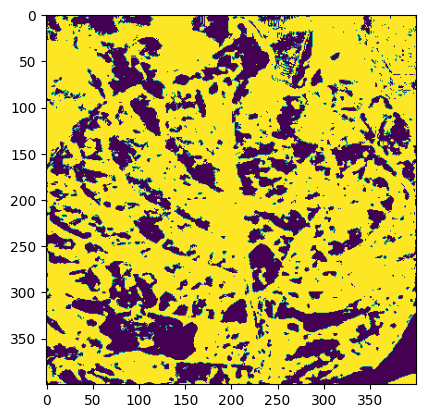

In [44]:
import numpy as np
import cv2
import os
from skimage.feature import greycomatrix, greycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Function to extract texture features
def extract_texture_features(images):
    features = []
    for img in images:
        if img.ndim == 2:
            # Grayscale image
            gray = img
        elif img.ndim == 3:
            # Color image, convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            raise ValueError("Invalid image shape. Expected 2 or 3 dimensions.")

        # Calculate Haralick texture features
        glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]

        segmentation_feature1=segmentation1(img)

        texture_features = np.array([
            contrast,
            energy,
            homogeneity,
            correlation,
            segmentation_feature1[0],
            segmentation_feature1[1],
            segmentation_feature1[2],
            segmentation_feature1[3],
            segmentation_feature1[4],
            segmentation_feature1[5],
            segmentation_feature1[6],
            segmentation_feature1[7],
            segmentation_feature1[8],
            segmentation_feature1[9],
            segmentation_feature1[10]
            ])
        features.append(texture_features)

    return np.array(features)

# Print texture feature names
print("Texture Features:")
texture_feature_names = ['Contrast', 'Energy', 'Homogeneity', 'Correlation']

x = np.array(x)
y = np.array(y)

# Extract texture features
x_texture_features = extract_texture_features(x)

# Prepare data
x_updated = x.reshape(len(x), -1)
# x_updated = np.concatenate((x_updated, x_texture_features, x_shape_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

In [45]:
import xgboost as xgb

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

Training Score: 0.990625
Test Score: 0.9625


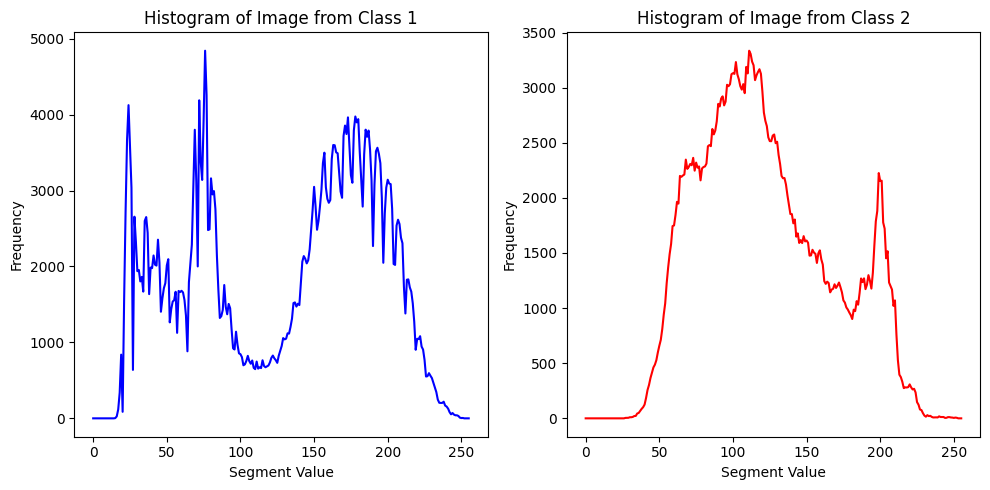

In [23]:
import matplotlib.pyplot as plt

# Choose one image from each class for comparison (0,5  1,5  10,52 15,23)
class1_idx = 15
class2_idx = 23

# Convert the chosen images to grayscale
gray_img1 = cv2.cvtColor(z[class1_idx], cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(z[class2_idx], cv2.COLOR_BGR2GRAY)

# Compute histograms for the grayscale images
hist1 = cv2.calcHist([gray_img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([gray_img2], [0], None, [256], [0, 256])

# Plot histogram for image from class 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist1, color='b')
plt.title(f"Histogram of Image from Class 1")
plt.xlabel("Segment Value")
plt.ylabel("Frequency")

# Plot histogram for image from class 2
plt.subplot(1, 2, 2)
plt.plot(hist2, color='r')
plt.title(f"Histogram of Image from Class 2")
plt.xlabel("Segment Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
# Print texture feature names
print("Texture Features:")
for feature_name in texture_feature_names:
    print(feature_name)

Texture Features:
Contrast
Energy
Homogeneity
Correlation


In [ ]:
# Print texture features
print("Texture Features:")
for i, feature_name in enumerate(texture_feature_names):
    print(f"{feature_name}: {x_texture_features[0][i]}")


Texture Features:
Contrast: 162.54450501254402
Energy: 0.012560475188571714
Homogeneity: 0.15710555433101028
Correlation: 0.9792042355521307


**Hyperparameters for Training**

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Training Score (Best Model):", best_model.score(x_train, y_train))
print("Test Score (Best Model):", best_model.score(x_test, y_test))


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Training Score (Best Model): 0.990625
Test Score (Best Model): 0.9625


**Accuracy and Loss Curve**

[0]	validation_0-logloss:0.47280	validation_0-error:0.02813	validation_1-logloss:0.49256	validation_1-error:0.05000
[1]	validation_0-logloss:0.35362	validation_0-error:0.02187	validation_1-logloss:0.38927	validation_1-error:0.03750
[2]	validation_0-logloss:0.26741	validation_0-error:0.01250	validation_1-logloss:0.31361	validation_1-error:0.03750
[3]	validation_0-logloss:0.20850	validation_0-error:0.01250	validation_1-logloss:0.27385	validation_1-error:0.03750
[4]	validation_0-logloss:0.16663	validation_0-error:0.00937	validation_1-logloss:0.23124	validation_1-error:0.03750
[5]	validation_0-logloss:0.13633	validation_0-error:0.00937	validation_1-logloss:0.20581	validation_1-error:0.03750
[6]	validation_0-logloss:0.11352	validation_0-error:0.00937	validation_1-logloss:0.18643	validation_1-error:0.03750
[7]	validation_0-logloss:0.09696	validation_0-error:0.00937	validation_1-logloss:0.17818	validation_1-error:0.03750
[8]	validation_0-logloss:0.08274	validation_0-error:0.00937	validation_1

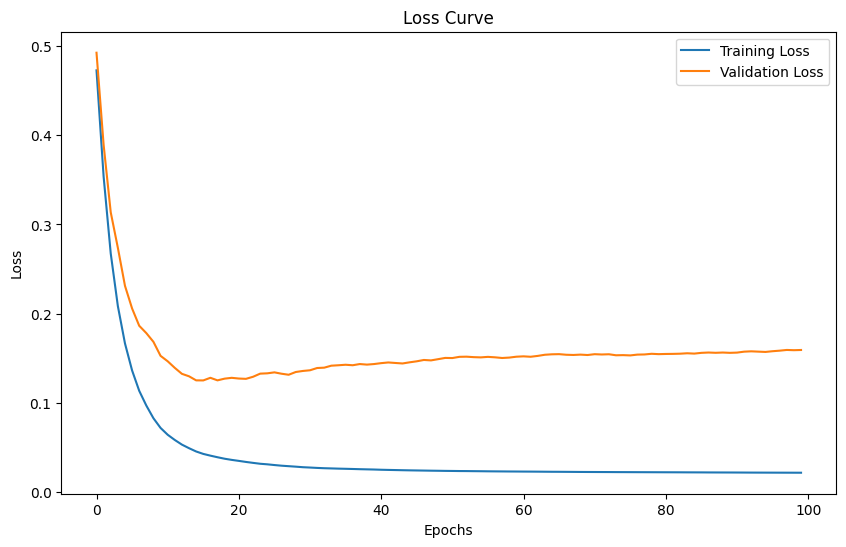

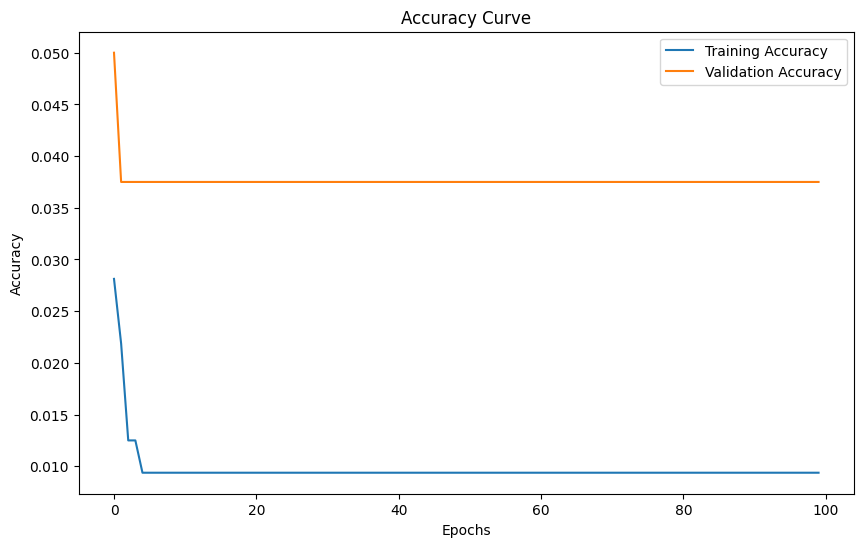

Training Score: 0.990625
Test Score: 0.9625


In [25]:
# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(eval_metric=['logloss', 'error'])  # Specify accuracy as an evaluation metric
eval_set = [(x_train, y_train), (x_test, y_test)]  # Specify the evaluation set
xgb_classifier.fit(x_train, y_train, eval_set=eval_set, verbose=True)

# Evaluate the model
train_loss = xgb_classifier.evals_result()['validation_0']['logloss']
train_accuracy = xgb_classifier.evals_result()['validation_0']['error']  # Use 'error' for accuracy
eval_loss = xgb_classifier.evals_result()['validation_1']['logloss']
eval_accuracy = xgb_classifier.evals_result()['validation_1']['error']  # Use 'error' for accuracy

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(eval_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Print the training and test scores
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))


**Tried out- Not Suitable**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

print("SVM - Training Score:", svm_classifier.score(x_train, y_train))
print("SVM - Test Score:", svm_classifier.score(x_test, y_test))

print("KNN - Training Score:", knn_classifier.score(x_train, y_train))
print("KNN - Test Score:", knn_classifier.score(x_test, y_test))

print("Decision Tree - Training Score:", dt_classifier.score(x_train, y_train))
print("Decision Tree - Test Score:", dt_classifier.score(x_test, y_test))

SVM - Training Score: 0.990625
SVM - Test Score: 0.95
KNN - Training Score: 0.978125
KNN - Test Score: 0.9375
Decision Tree - Training Score: 0.990625
Decision Tree - Test Score: 0.9375


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Create and train the Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

print("Logistic Regression - Training Score:", lr_classifier.score(x_train, y_train))
print("Logistic Regression - Test Score:", lr_classifier.score(x_test, y_test))

print("Naive Bayes - Training Score:", nb_classifier.score(x_train, y_train))
print("Naive Bayes - Test Score:", nb_classifier.score(x_test, y_test))

print("Random Forest - Training Score:", rf_classifier.score(x_train, y_train))
print("Random Forest - Test Score:", rf_classifier.score(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Score: 0.990625
Logistic Regression - Test Score: 0.95
Naive Bayes - Training Score: 0.784375
Naive Bayes - Test Score: 0.7375
Random Forest - Training Score: 0.990625
Random Forest - Test Score: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


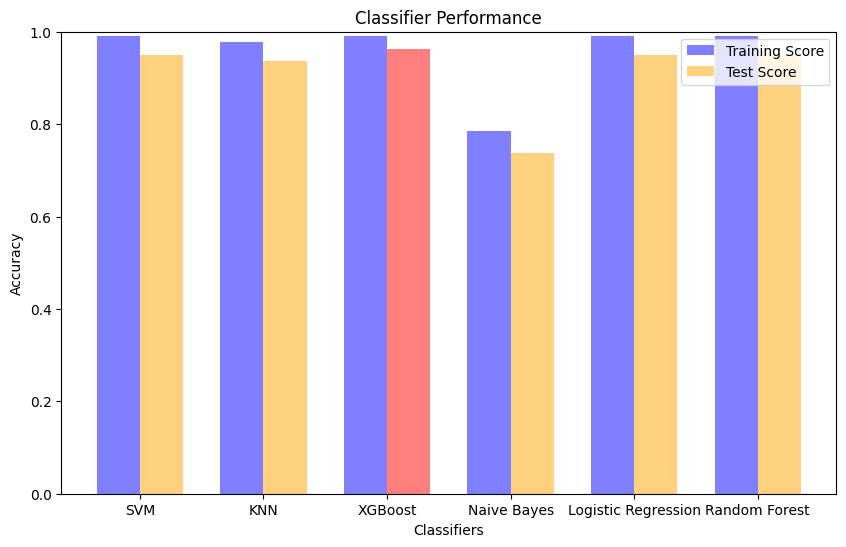

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Create and train the Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Compute the scores
svm_train_score = svm_classifier.score(x_train, y_train)
svm_test_score = svm_classifier.score(x_test, y_test)

knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

xgb_train_score = xgb_classifier.score(x_train, y_train)
xgb_test_score = xgb_classifier.score(x_test, y_test)

nb_train_score = nb_classifier.score(x_train, y_train)
nb_test_score = nb_classifier.score(x_test, y_test)

lr_train_score = lr_classifier.score(x_train, y_train)
lr_test_score = lr_classifier.score(x_test, y_test)

rf_train_score = rf_classifier.score(x_train, y_train)
rf_test_score = rf_classifier.score(x_test, y_test)

# Create a list of classifier labels
classifiers = ['SVM', 'KNN', 'XGBoost', 'Naive Bayes', 'Logistic Regression', 'Random Forest']

# Create lists of training and test scores
training_scores = [svm_train_score, knn_train_score, xgb_train_score, nb_train_score, lr_train_score, rf_train_score]
test_scores = [svm_test_score, knn_test_score, xgb_test_score, nb_test_score, lr_test_score, rf_test_score]

# Set the position of the bars on the x-axis
bar_width = 0.35
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]

# Plot the histogram
plt.figure(figsize=(10, 6))

# Highlight the highest testing score with red color
max_test_score = max(test_scores)
test_colors = ['orange' if score < max_test_score else 'red' for score in test_scores]

plt.bar(r1, training_scores, color='blue', width=bar_width, alpha=0.5, label='Training Score')
plt.bar(r2, test_scores, color=test_colors, width=bar_width, alpha=0.5, label='Test Score')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.xticks([r + bar_width/2 for r in range(len(classifiers))], classifiers)
plt.ylim([0, 1])
plt.legend()
plt.show()


**Randomly Prediction**

In [30]:
pred = xgb_classifier.predict(x_test)
incorrect_indices = np.where(y_test != pred)

print("Incorrect predictions indices:", incorrect_indices)

Incorrect predictions indices: (array([15, 46, 77]),)


In [31]:
pred[8]

0

In [32]:
y_test[8]

0

**Evaluation**

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
y_train_pred = xgb_classifier.predict(x_train)
y_test_pred = xgb_classifier.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

# Classification report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.990625
Testing Accuracy: 0.9625
Training Precision: 0.9906471370983523
Testing Precision: 0.9628361475922451
Training Recall: 0.990625
Testing Recall: 0.9625
Training F1 Score: 0.9906263763151456
Testing F1 Score: 0.9625176028790488

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.95      0.96        42

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



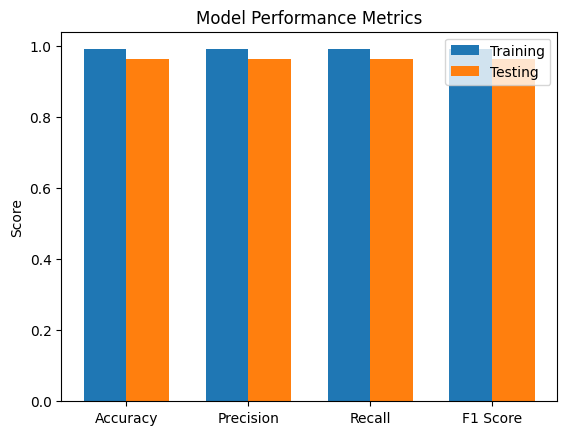

In [34]:
import matplotlib.pyplot as plt

# Performance metrics for training and testing sets
training_metrics = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_recall,
    'F1 Score': train_f1
}

testing_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1 Score': test_f1
}

# Plot the performance metrics
fig, ax = plt.subplots()
x_train = np.arange(len(training_metrics))
x_test = np.arange(len(testing_metrics))
width = 0.35

# Plot training metrics
ax.bar(x_train, list(training_metrics.values()), width, label='Training')

# Plot testing metrics
ax.bar(x_test + width, list(testing_metrics.values()), width, label='Testing')

ax.set_xticks(x_train + width/2)
ax.set_xticklabels(training_metrics.keys())
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.legend()
plt.show()


**Training and Testing Rates Evaluation on XGBoost**

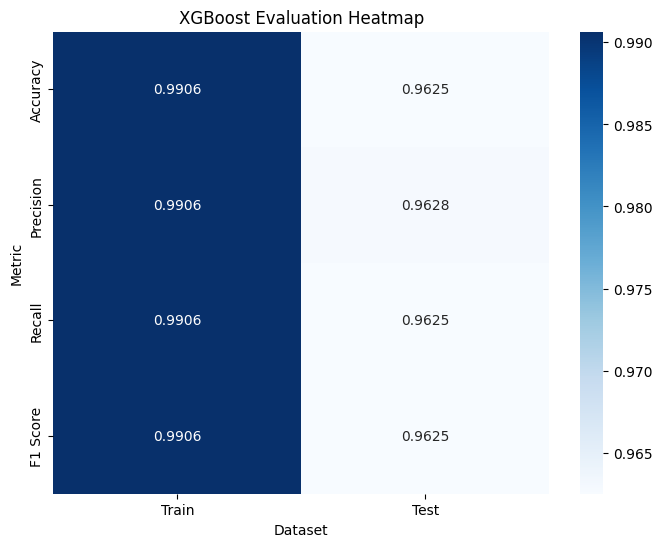

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D array of metric scores
metric_scores = np.array([
    [train_accuracy, test_accuracy],
    [train_precision, test_precision],
    [train_recall, test_recall],
    [train_f1, test_f1]
])

# Define the row labels and column labels for the heatmap
row_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
column_labels = ['Train', 'Test']

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(metric_scores, annot=True, cmap='Blues', fmt='.4f', xticklabels=column_labels, yticklabels=row_labels)
plt.title('XGBoost Evaluation Heatmap')
plt.xlabel('Dataset')
plt.ylabel('Metric')
plt.show()


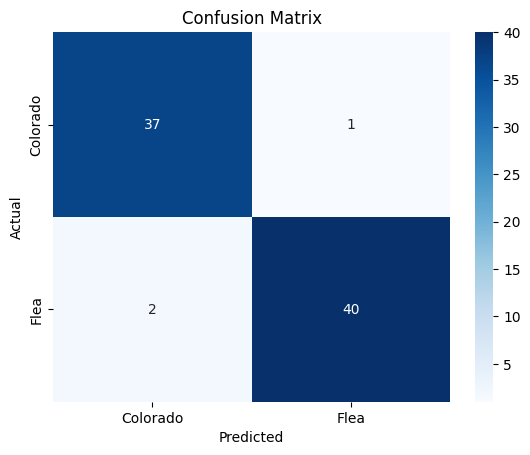

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate and visualize the confusion matrix on the testing data
cm = confusion_matrix(y_test, y_test_pred)
class_names = ['Colorado', 'Flea']

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Classification techniques Evaluation**

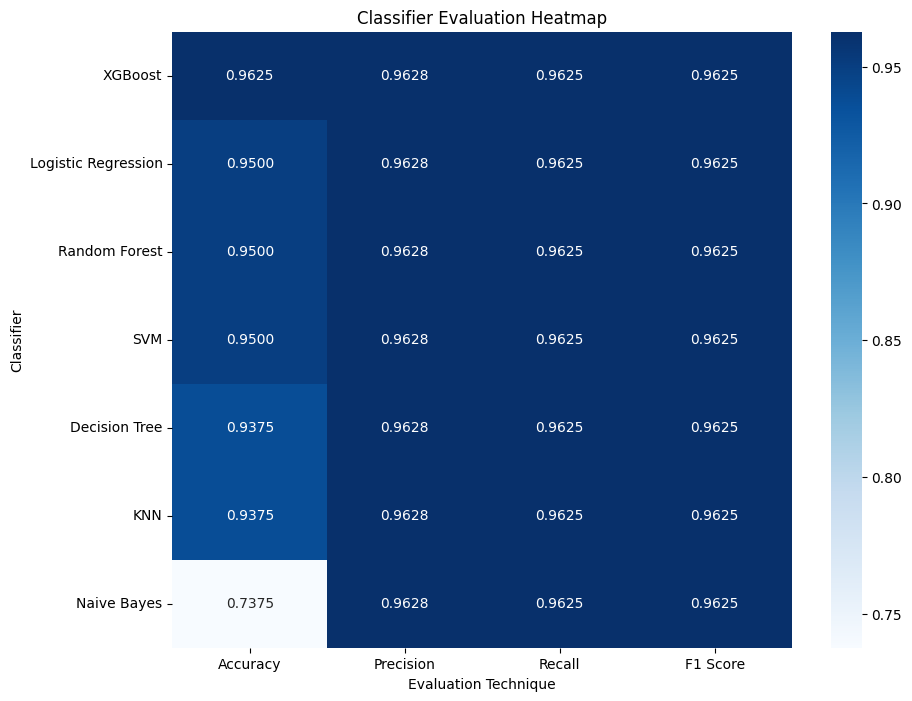

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the evaluation techniques
eval_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the classification techniques
classifiers = [ 'XGBoost','Logistic Regression', 'Random Forest','SVM','Decision Tree', 'KNN', 'Naive Bayes']

# Define the metric scores for different classifiers and evaluation techniques
metric_scores = np.array([
    [xgb_classifier.score(x_test, y_test), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')],
    [lr_classifier.score(x_test, y_test), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')],
    [rf_classifier.score(x_test, y_test), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')],
    [svm_classifier.score(x_test, y_test), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')],
    [dt_classifier.score(x_test, y_test), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')],
    [knn_classifier.score(x_test, y_test), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')],
    [nb_classifier.score(x_test, y_test), precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')]
])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(metric_scores, annot=True, cmap='Blues', fmt='.4f', xticklabels=eval_metrics, yticklabels=classifiers)
plt.title('Classifier Evaluation Heatmap')
plt.xlabel('Evaluation Technique')
plt.ylabel('Classifier')
plt.show()


**Save trained model**

In [ ]:
import joblib

# Save the trained model
joblib.dump(xgb_classifier, '/content/drive/MyDrive/Insect/Insect Detection Model/xgb_classifier.pkl')

['/content/drive/MyDrive/Insect/Insect Detection Model/xgb_classifier.pkl']

**Testing**

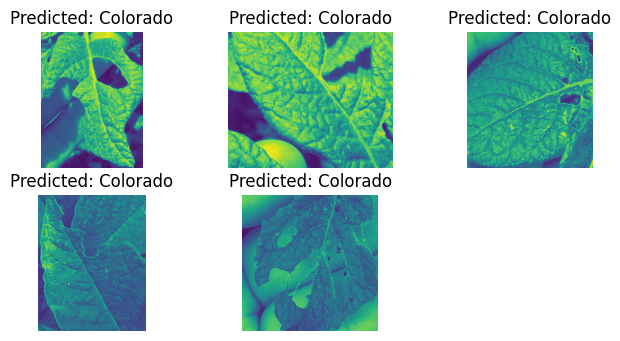

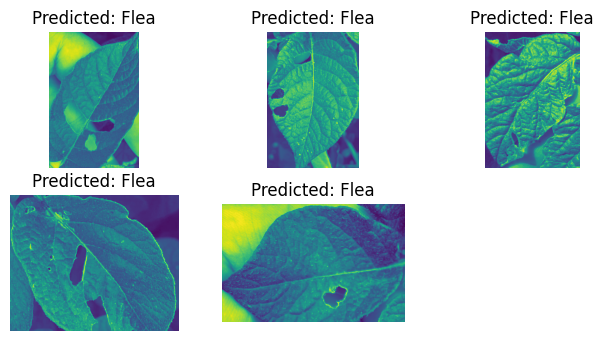

In [20]:
import joblib
import os
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/xgb_classifier.pkl')

# Define the class names
class_names = ['Colorado', 'Flea']

# Create an empty figure
plt.figure(figsize=(8, 6))
c = 1

# Iterate over the test images
for i, image_name in enumerate(os.listdir('/content/drive/MyDrive/Insect/Testing/Colorado/')[:5]):
    plt.subplot(3, 3, c)

    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/' + image_name, 0)
    img_resized = cv2.resize(img, (163, 1))
    img_flattened = img_resized.flatten() / 255

    # Check if the image shape matches the expected shape (163)
    if img_flattened.shape[0] != 163:
        continue

    # Make a prediction on the image
    pred = model.predict(np.array([img_flattened]))
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes

    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    c += 1

plt.show()

# Create an empty figure
plt.figure(figsize=(8, 6))
c = 1

for i, image_name in enumerate(os.listdir('/content/drive/MyDrive/Insect/Testing/Flea/')[:5]):
    plt.subplot(3, 3, c)

    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/' + image_name, 0)
    img_resized = cv2.resize(img, (163, 1))
    img_flattened = img_resized.flatten() / 255

    # Check if the image shape matches the expected shape (163)
    if img_flattened.shape[0] != 163:
        continue

    class_names = ['Flea','Colorado']

    # Make a prediction on the image
    pred = model.predict(np.array([img_flattened]))
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes

    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    c += 1

plt.show()


In [ ]:
def feature_extractor_custom(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):

        df = pd.DataFrame()
        img = dataset[image, :,:]

        df = pd.DataFrame({
            'perimeter1': [perimeter1],
            'Circularity1': [circularity1],
            'Perimeter2': [perimeter2],
            'Circularity3': [circularity3],
            'Perimeter4': [perimeter4],
            'Circularity4' : [circularity4],
            'Perimeter5' : [perimeter5],
            'Circularity5' : [circularity5]

        })

        image_dataset = pd.concat([image_dataset,df])
        print(image_dataset.shape)

    return image_dataset;

In [ ]:
x = np.array(x)
y = np.array(y)

# Prepare data
x_updated = x.reshape(len(x), -1)
# x_updated = np.concatenate((x_updated, x_texture_features, x_shape_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

KeyboardInterrupt: ignored

In [ ]:
path = '/content/drive/MyDrive/Insect/bgRemove/'
classes = {'Colorado': 0, 'flea': 1}

x = []
y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 1)

        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        image = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        x.append(thresh)
        y.append(classes[cls])